<a href="https://colab.research.google.com/github/Mike-R0d/Macroeconomics_Outlock/blob/main/Macroeconomic_Outlook_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pystatscan
# !pip install wbdata


In [ ]:
# https://stats-can.readthedocs.io/en/latest/
# https://www150.statcan.gc.ca/n1/en/type/data
# https://www.bankofcanada.ca/valet/docs

In [ ]:
import sqlite3
import pandas as pd
from stats_can import StatsCan

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Lista de números de tabla de StatsCan
table_numbers = [
    "36-10-0104-01",  # PIB real (ajustado por inflación)
    "36-10-0096-01",  # Capital físico (formación bruta de capital fijo)
    "14-10-0023-01",  # Trabajo (fuerza laboral)
    "36-10-0222-01",  # PIB de las provincias
    "25-10-0015-01",  # Población de Canadá
    "25-10-0055-01",  # Población de las provincias
    "98-10-0002-01",  # Personas nacidas en Canadá y viven en Canadá
    "98-10-0003-01",  # Personas nacidas fuera de Canadá y viven en Canadá
    "98-10-0004-01"   # Personas que se han ido de Canadá
]

# Ruta de la base de datos SQLite
path_db = r'I:\My Drive\Portfolio\Macro indexes\macroeconomy_canada.db'

# Conectar a la base de datos SQLite
sqlite_connection = sqlite3.connect(path_db)
sqlite_cursor = sqlite_connection.cursor()

# Bucle para obtener los datos de cada tabla y crear una tabla en SQLite
for table_number in table_numbers:
    try:
        # Obtener los datos de la tabla
        df = sc.table_to_df(table_number)

        # Verifica si hay datos en el DataFrame
        if df.empty:
            print(f"No data found for table {table_number}.")
            continue

        # Obtener los encabezados de las columnas del DataFrame
        columns = df.columns

        # Definir el nombre de la tabla utilizando el número de la tabla
        table_name = f'table_{table_number.replace("-", "_")}'

        # Crear la consulta para crear la tabla usando los nombres de las columnas del DataFrame
        # Colocar entre corchetes las columnas para evitar nombres conflictivos con SQL
        create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({' TEXT, '.join([f'[{col}]' for col in columns])} TEXT)"

        # Ejecutar la consulta para crear la tabla
        sqlite_cursor.execute(create_table_query)

        # Preparar los datos para insertar
        data_to_insert = df.to_records(index=False)
        columns_to_insert = ', '.join([f'[{col}]' for col in columns])  # Asegurarse de que los nombres de las columnas estén entre corchetes
        placeholders = ', '.join(['?'] * len(columns))

        # Ejecutar la inserción de los datos
        sqlite_cursor.executemany(f"INSERT INTO {table_name} ({columns_to_insert}) VALUES ({placeholders})", data_to_insert)

        # Confirmar los cambios
        sqlite_connection.commit()

        print(f"Data successfully inserted into the {table_name} table.")

    except Exception as e:
        print(f"Error processing table {table_number}: {e}")

# Cerrar la conexión
sqlite_connection.close()


In [ ]:
# # Inicializar la conexión con StatsCan
# sc = StatsCan()

# # Lista de números de tabla de StatsCan
# table_numbers = [
#     "36-10-0104-01",  # PIB real (ajustado por inflación)
#     "36-10-0096-01",  # Capital físico (formación bruta de capital fijo)
#     "14-10-0023-01",  # Trabajo (fuerza laboral)
#     "36-10-0222-01",  # PIB de las provincias
#     "25-10-0015-01",  # Población de Canadá
#     "25-10-0055-01",  # Población de las provincias
#     "98-10-0002-01",  # Personas nacidas en Canadá y viven en Canadá
#     "98-10-0003-01",  # Personas nacidas fuera de Canadá y viven en Canadá
#     "98-10-0004-01"   # Personas que se han ido de Canadá
# ]

# # Ruta de la base de datos SQLite
# path_db = r'I:\My Drive\Portfolio\Macro indexes\macroeconomy_canada.db'

# # Conectar a la base de datos SQLite
# sqlite_connection = sqlite3.connect(path_db)
# sqlite_cursor = sqlite_connection.cursor()

# # Bucle para obtener los datos de cada tabla y crear una tabla en SQLite
# for table_number in table_numbers:
#     try:
#         # Obtener los datos de la tabla
#         df = sc.table_to_df(table_number)

#         # Verifica si hay datos en el DataFrame
#         if df.empty:
#             print(f"No data found for table {table_number}.")
#             continue

#         # Asegurarse de que las columnas de fecha están en formato datetime
#         if 'REF_DATE' in df.columns:
#             df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], errors='coerce')  # Convertir a datetime

#         # Obtener los encabezados de las columnas del DataFrame
#         columns = df.columns

#         # Definir el nombre de la tabla utilizando el número de la tabla
#         table_name = f'table_{table_number.replace("-", "_")}'

#         # Crear la consulta para crear la tabla usando los nombres de las columnas del DataFrame
#         # Colocar entre corchetes las columnas para evitar nombres conflictivos con SQL
#         create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} ({' TEXT, '.join([f'[{col}]' for col in columns])} TEXT)"

#         # Ejecutar la consulta para crear la tabla
#         sqlite_cursor.execute(create_table_query)

#         # Preparar los datos para insertar
#         data_to_insert = df.to_records(index=False)
#         columns_to_insert = ', '.join([f'[{col}]' for col in columns])  # Asegurarse de que los nombres de las columnas estén entre corchetes
#         placeholders = ', '.join(['?'] * len(columns))

#         # Ejecutar la inserción de los datos
#         sqlite_cursor.executemany(f"INSERT INTO {table_name} ({columns_to_insert}) VALUES ({placeholders})", data_to_insert)

#         # Confirmar los cambios
#         sqlite_connection.commit()

#         print(f"Data successfully inserted into the {table_name} table.")

#     except Exception as e:
#         print(f"Error processing table {table_number}: {e}")

# # Cerrar la conexión
# sqlite_connection.close()


In [ ]:
import sqlite3

# Lista de números de tabla de StatsCan
table_numbers = [
    "36-10-0104-01",  # PIB real (ajustado por inflación)
    "36-10-0096-01",  # Capital físico (formación bruta de capital fijo)
    "14-10-0023-01",  # Trabajo (fuerza laboral)
    "36-10-0222-01",  # PIB de las provincias
    "25-10-0015-01",  # Población de Canadá
    "25-10-0055-01",  # Población de las provincias
    "98-10-0002-01",  # Personas nacidas en Canadá y viven en Canadá
    "98-10-0003-01",  # Personas nacidas fuera de Canadá y viven en Canadá
    "98-10-0004-01"   # Personas que se han ido de Canadá
]

# Ruta de la base de datos SQLite
path_db = r'G:\My Drive\Portfolio\Macro indexes\macroeconomy_canada.db'

# Conectar a la base de datos SQLite
sqlite_connection = sqlite3.connect(path_db)
sqlite_cursor = sqlite_connection.cursor()

# Bucle para eliminar las tablas correspondientes
for table_number in table_numbers:
    try:
        # Definir el nombre de la tabla utilizando el número de la tabla
        table_name = f'table_{table_number.replace("-", "_")}'

        # Crear la consulta para eliminar la tabla
        drop_table_query = f"DROP TABLE IF EXISTS {table_name}"

        # Ejecutar la consulta para eliminar la tabla
        sqlite_cursor.execute(drop_table_query)

        # Confirmar los cambios
        sqlite_connection.commit()

        print(f"Table {table_name} successfully deleted.")

    except Exception as e:
        print(f"Error deleting table {table_name}: {e}")

# Cerrar la conexión
sqlite_connection.close()


### Evolution of Mortgage Interest Rates in Canada
___________________________________________________________________

In [ ]:
import pandas as pd
import requests
import plotly.graph_objects as go

# Function to fetch data from Bank of Canada Valet API
def fetch_interest_rate_data(series_id):
    url = f"https://www.bankofcanada.ca/valet/observations/{series_id}/json"
    response = requests.get(url)
    data = response.json()
    observations = data['observations']

    dates = []
    interest_rates = []

    for obs in observations:
        date = obs['d']
        rate = obs[series_id]['v'] if series_id in obs else None
        if rate:
            dates.append(date)
            interest_rates.append(float(rate))

    df = pd.DataFrame({
        'Date': pd.to_datetime(dates),
        'Interest Rate': interest_rates
    })
    df.set_index('Date', inplace=True)
    return df

# Fetch data for Manitoba (using the national average as a proxy)
manitoba_df = fetch_interest_rate_data("V122530")

# # Fetch data for Quebec (using the national average as a proxy)
# quebec_df = fetch_interest_rate_data("V122530")

# Create the plot
fig = go.Figure()

# Add Manitoba data to the plot
fig.add_trace(go.Scatter(
    x=manitoba_df.index,
    y=manitoba_df['Interest Rate'],
    mode='lines',
    name='Manitoba Mortgage Interest Rate',
    line=dict(color='blue')
))

# # Add Quebec data to the plot
# fig.add_trace(go.Scatter(
#     x=quebec_df.index,
#     y=quebec_df['Interest Rate'],
#     mode='lines',
#     name='Quebec Mortgage Interest Rate',
#     line=dict(color='green')
# ))

# Update the layout
fig.update_layout(
    title='Evolution of Mortgage Interest Rates in Canada',
    xaxis_title='Date',
    yaxis_title='Interest Rate (%)',
    legend_title='Province',
    height=600
)

# Show the plot
fig.show()


## Inflation and Interest Rates in Canada
___________________________________________________________

In [17]:
import pandas as pd
import requests
import plotly.graph_objects as go

# Function to fetch data from Statistics Canada
def fetch_data(series_id):
    url = f"https://www.bankofcanada.ca/valet/observations/{series_id}/json"
    response = requests.get(url)
    data = response.json()

    if 'observations' not in data:
        raise KeyError(f"'observations' key not found in the data for series {series_id}")

    observations = data['observations']

    dates = []
    values = []

    for obs in observations:
        date = obs['d']
        value = obs[series_id]['v'] if series_id in obs else None
        if value:
            dates.append(date)
            values.append(float(value))

    df = pd.DataFrame({
        'Date': pd.to_datetime(dates),
        'Value': values
    })
    df.set_index('Date', inplace=True)
    return df

# Fetch data for All-items and All-items excluding food and energy
all_items_df = fetch_data("V41690973")  # Total Consumer Price Index (CPI) Year-over-Year Inflation Rate
excluding_food_energy_df = fetch_data("V41690914")  # Core Consumer Price Index (CPI) Year-over-Year Inflation Rate

# Fetch data for mortgage interest rate
interest_rate_df = fetch_data("V122530")  # 5-year mortgage interest rate

# Calculate year-over-year growth rates
all_items_df['All-items'] = all_items_df['Value'].pct_change(periods=12) * 100
excluding_food_energy_df['All-items excluding food and energy'] = excluding_food_energy_df['Value'].pct_change(periods=12) * 100

# Filter data to show only from the year 2014 onwards
all_items_df = all_items_df[all_items_df.index >= '1997-01-01']
excluding_food_energy_df = excluding_food_energy_df[excluding_food_energy_df.index >= '1997-01-01']
interest_rate_df = interest_rate_df[interest_rate_df.index >= '1997-01-01']

# Create the plot
fig = go.Figure()

# Add all-items data to the plot
fig.add_trace(go.Scatter(
    x=all_items_df.index,
    y=all_items_df['All-items'],
    mode='lines',
    name='All-items',
    line=dict(color='red')
))

# Add excluding food and energy data to the plot
fig.add_trace(go.Scatter(
    x=excluding_food_energy_df.index,
    y=excluding_food_energy_df['All-items excluding food and energy'],
    mode='lines',
    name='All-items excluding food and energy',
    line=dict(color='blue')
))

# Add mortgage interest rate data to the plot
fig.add_trace(go.Scatter(
    x=interest_rate_df.index,
    y=interest_rate_df['Value'],
    mode='lines',
    name='5-Year Mortgage Interest Rate',
    line=dict(color='green')
))

# Add shaded area for Range of Core BoC Measures
fig.add_shape(type="rect",
    x0='1997-01-01', y0=1, x1='2024-01-01', y1=4,
    fillcolor="gray", opacity=0.2, line_width=0, layer='below'
)

# Add annotation for Range of Core BoC Measures
fig.add_annotation(x='2021-01-01', y=4,
    text="Range of Core<br>BoC Measures",
    showarrow=True, arrowhead=2, ax=-40, ay=-40
)

# Update the layout
fig.update_layout(
    title='Year-over-Year Change in Consumer Prices and Mortgage Interest Rates in Canada',
    xaxis_title='Date',
    yaxis_title='Per Cent',
    legend_title='Measure',
    height=600
)

# Show the plot
fig.show()


## Interest Rates and bond maturities in Canada
________________________________________________________________________________

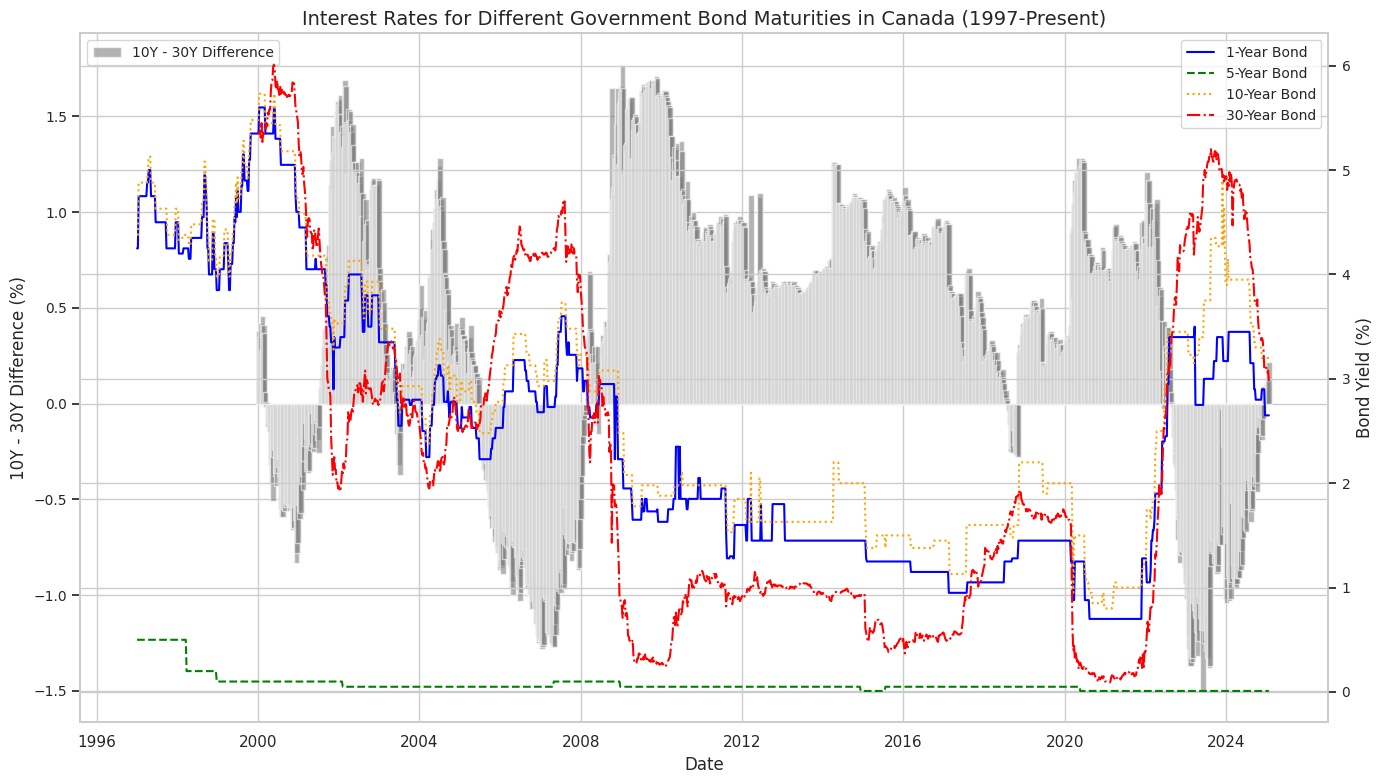

In [27]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch data from Bank of Canada Valet API
def fetch_data(series_id):
    url = f"https://www.bankofcanada.ca/valet/observations/{series_id}/json"
    response = requests.get(url)
    data = response.json()

    if 'observations' not in data:
        raise KeyError(f"'observations' key not found in the data for series {series_id}")

    observations = data['observations']

    dates = []
    values = []

    for obs in observations:
        date = obs['d']
        value = obs[series_id]['v'] if series_id in obs else None
        if value:
            dates.append(date)
            values.append(float(value))

    df = pd.DataFrame({
        'Date': pd.to_datetime(dates),
        'Value': values
    })
    df.set_index('Date', inplace=True)
    return df

# Fetch data for different bond maturities
one_year_df = fetch_data("V80691336")  # 1-year Government of Canada bond yield
five_year_df = fetch_data("V80691338")  # 5-year Government of Canada bond yield
ten_year_df = fetch_data("V80691341")  # 10-year Government of Canada bond yield
thirty_year_df = fetch_data("V80691345")  # 30-year Government of Canada bond yield

# Filter data to show only from the year 1997 onwards
one_year_df = one_year_df[one_year_df.index >= '1997-01-01']
five_year_df = five_year_df[five_year_df.index >= '1997-01-01']
ten_year_df = ten_year_df[ten_year_df.index >= '1997-01-01']
thirty_year_df = thirty_year_df[thirty_year_df.index >= '1997-01-01']

# Calculate the difference between 10-Year and 30-Year bonds
difference = ten_year_df['Value'] - thirty_year_df['Value']

# Plotting with Seaborn
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot the difference as bars on the left y-axis
ax1.bar(difference.index, difference, color="gray", alpha=0.6,width=50, label="10Y - 30Y Difference")
ax1.set_ylabel("10Y - 30Y Difference (%)", fontsize=12)
ax1.set_xlabel("Date", fontsize=12)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc="upper left", fontsize=10)

# Create a secondary y-axis for bond yields
ax2 = ax1.twinx()
sns.lineplot(data=one_year_df, x=one_year_df.index, y="Value", label="1-Year Bond", color="blue", ax=ax2)
sns.lineplot(data=five_year_df, x=five_year_df.index, y="Value", label="5-Year Bond", color="green", linestyle="--", ax=ax2)
sns.lineplot(data=ten_year_df, x=ten_year_df.index, y="Value", label="10-Year Bond", color="orange", linestyle=":", ax=ax2)
sns.lineplot(data=thirty_year_df, x=thirty_year_df.index, y="Value", label="30-Year Bond", color="red", linestyle="-.", ax=ax2)
ax2.set_ylabel("Bond Yield (%)", fontsize=12)
ax2.tick_params(axis='y', labelsize=10)
ax2.legend(loc="upper right", fontsize=10)

# Customizing plot
title = "Interest Rates for Different Government Bond Maturities in Canada (1997-Present)"
plt.title(title, fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Exchange Rates Canada

---



[*********************100%***********************]  2 of 2 completed


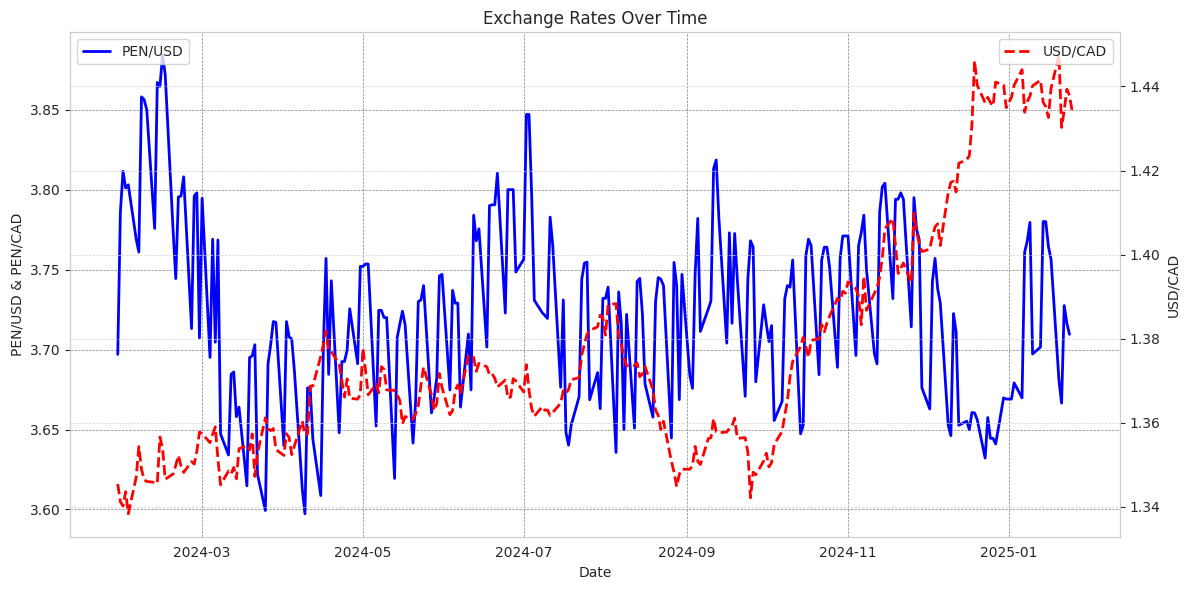

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Define tickers and date range
tickers = ["CAD=X", "PEN=X"]  # USD/CAD and PEN/USD
end_date = date.today()
start_date = end_date - timedelta(days=365)  # 1 year of data

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Extract relevant data
usdcad = data['Close']['CAD=X']
penusd = data['Close']['PEN=X']

# Calculate PEN/CAD
pencad = penusd / usdcad

# Create a figure and axis
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Use a clean white background

# Plot PEN/USD
sns.lineplot(x=penusd.index, y=penusd, label="PEN/USD", color="blue", linewidth=2)
# Create a secondary y-axis for USD/CAD
ax = plt.gca()
ax2 = ax.twinx()

# Plot USD/CAD on the secondary y-axis
sns.lineplot(x=usdcad.index, y=usdcad, label="USD/CAD", ax=ax2, color="red", linewidth=2, linestyle="--")

# Customize the axes and labels
ax.set_ylabel("PEN/USD & PEN/CAD")
ax2.set_ylabel("USD/CAD")
ax.set_xlabel("Date")
ax.set_title("Exchange Rates Over Time")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust grid and layout
ax.grid(True, which="both", linestyle="--", linewidth=0.5, color="grey")
ax2.grid(True, which="both", linestyle="--", linewidth=0.5, color="lightgrey")
plt.tight_layout()

# Show the plot
plt.show()


[*********************100%***********************]  2 of 2 completed


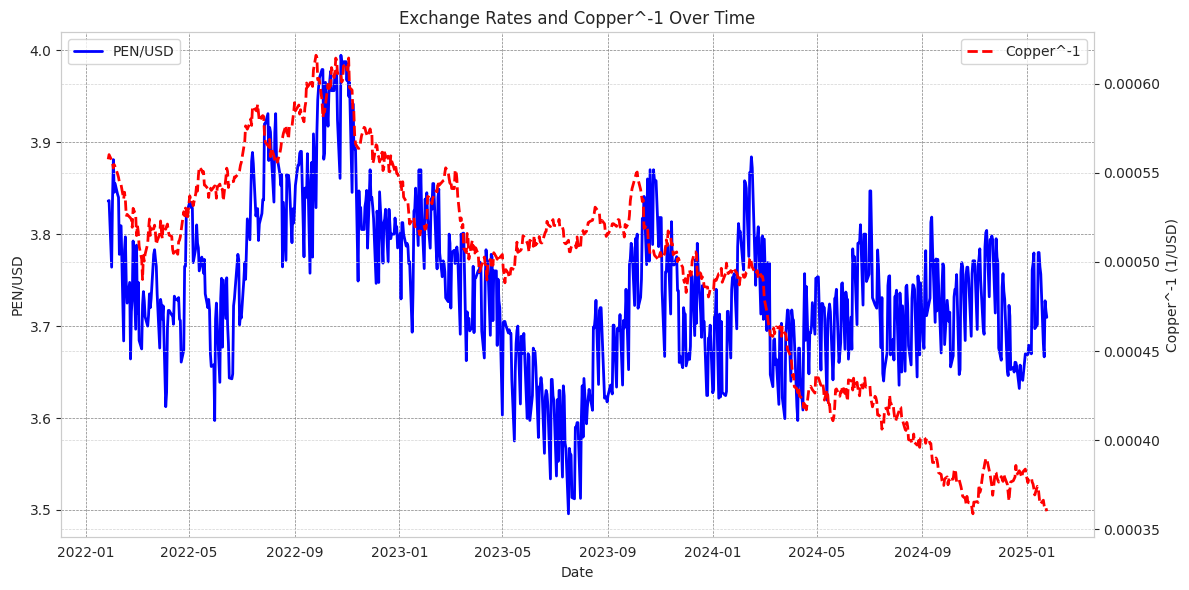

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Define tickers and date range
tickers = ["HG=F", "PEN=X"]  # Copper futures and PEN/USD
end_date = date.today()
start_date = end_date - timedelta(days=365*3)  # 1 year of data

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Extract relevant data
copper_price = data['Close']['HG=F']  # Copper futures
penusd = data['Close']['PEN=X']

# Calculate PEN/CAD
copper_inverse = 1 / copper_price  # Copper^-1

# Create a figure and axis
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Use a clean white background

# Plot PEN/USD
sns.lineplot(x=penusd.index, y=penusd, label="PEN/USD", color="blue", linewidth=2)

# Create a secondary y-axis for Copper^-1
ax = plt.gca()
ax2 = ax.twinx()

# Plot Copper^-1 on the secondary y-axis
sns.lineplot(x=copper_inverse.index, y=copper_inverse, label="Copper^-1", ax=ax2, color="red", linewidth=2, linestyle="--")

# Customize the axes and labels
ax.set_ylabel("PEN/USD")
ax2.set_ylabel("Copper^-1 (1/USD)")
ax.set_xlabel("Date")
ax.set_title("Exchange Rates and Copper^-1 Over Time")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Adjust grid and layout
ax.grid(True, which="both", linestyle="--", linewidth=0.5, color="grey")
ax2.grid(True, which="both", linestyle="--", linewidth=0.5, color="lightgrey")
plt.tight_layout()

# Show the plot
plt.show()


## Commodities

---

In [ ]:
# prompt: # prompt: # prompt: Usando yahoo finance has un codigo para obtener las cotizaciones de los principales comodities y graficalos con plotly, normalizalos para que sean comparables
# # y agrega el indice de commodities osea S&P-GSCI Commodity Index Future (GD=F)

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from datetime import date, timedelta

# Define the commodities and the S&P-GSCI index
tickers = ["GC=F", "SI=F", "CL=F", "ZC=F", "HG=F", "GD=F"]  # Gold, Silver, Crude Oil, Corn, Copper, S&P-GSCI
end_date = date.today()
start_date = end_date - timedelta(days=365)  # 1 year of data

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Extract closing prices
commodity_data = data['Close']

# Normalize the data
normalized_data = commodity_data / commodity_data.iloc[0]

# Create Plotly figure
fig = go.Figure()

# Add traces for each commodity
for column in normalized_data.columns:
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[column], name=column))

# Update layout
fig.update_layout(
    title="Normalized Commodity Prices",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Commodity",
    height=600
)

# Show the plot
fig.show()

[*********************100%***********************]  6 of 6 completed


In [ ]:
# prompt: has una grafica donde en el primer eje este solo el tipo de cambio PENUSD  y el segundo eje el indice de commodities

import plotly.graph_objects as go
import yfinance as yf
from datetime import date, timedelta

# Define tickers and date range
tickers = ["PEN=X"]  # PEN/USD
commodities_ticker = "GD=F" # S&P-GSCI Commodity Index
end_date = date.today()
start_date = end_date - timedelta(days=365)  # 1 year of data

# Download data from Yahoo Finance
data_exchange = yf.download(tickers, start=start_date, end=end_date)
data_commodities = yf.download(commodities_ticker, start=start_date, end=end_date)


# Extract relevant data
penusd = data_exchange['Close']['PEN=X']
commodities_index = data_commodities['Close']


# Create Plotly figure
fig = go.Figure()

# Add PEN/USD to the primary y-axis
fig.add_trace(go.Scatter(x=penusd.index, y=penusd, name="PEN/USD", line=dict(color='blue'), yaxis="y1"))

# Add commodities index to the secondary y-axis
fig.add_trace(go.Scatter(x=commodities_index.index, y=commodities_index, name="S&P GSCI", line=dict(color='red'), yaxis="y2"))

# Update layout with a clean white background
fig.update_layout(
    title="Exchange Rate PEN/USD vs. S&P GSCI Commodity Index",
    xaxis_title="Date",
    yaxis=dict(title="PEN/USD", side = "left"),
    yaxis2=dict(title="S&P GSCI", overlaying="y", side="right"),
    plot_bgcolor="white",  # White background
    paper_bgcolor="white"   # White background
)

# Show the plot
fig.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# prompt: Usando yahoo finance has un codigo para obtener las cotizaciones de los principales comodities y graficalos con plotly, normalizalos para que sean comparables

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from datetime import date, timedelta

# Define the commodities and their corresponding tickers
commodities = {
    "Gold": "GC=F",
    "Silver": "SI=F",
    "Crude Oil": "CL=F",
    "Copper": "HG=F",
    "Natural Gas": "NG=F",
}

# Define the date range
end_date = date.today()
start_date = end_date - timedelta(days=365)  # 1 year of data

# Download data from Yahoo Finance
data = yf.download(list(commodities.values()), start=start_date, end=end_date)

# Extract closing prices
closing_prices = data["Close"]

# Normalize the data
normalized_prices = closing_prices / closing_prices.iloc[0]

# Create the Plotly figure
fig = go.Figure()

# Add traces for each commodity
for commodity, ticker in commodities.items():
    fig.add_trace(go.Scatter(
        x=normalized_prices.index,
        y=normalized_prices[ticker],
        mode="lines",
        name=commodity
    ))

# Update the layout
fig.update_layout(
    title="Normalized Commodity Prices (Past Year)",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Commodity",
)

# Show the plot
fig.show()

[*********************100%***********************]  5 of 5 completed


## War monitor
---



In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from datetime import date, timedelta

# Define the defense companies and the VIX ticker
defense_companies = {
    "Lockheed Martin": "LMT",
    "Raytheon Technologies": "RTX",
    "Northrop Grumman": "NOC",
    "Boeing": "BA",
    "General Dynamics": "GD"
    # Add more defense companies as needed
}
vix_ticker = "^VIX"

# Define the date range
end_date = date.today()
start_date = end_date - timedelta(days=365*3)  # 1 year of data

# Download data from Yahoo Finance
data = yf.download(list(defense_companies.values()) + [vix_ticker], start=start_date, end=end_date)

# Extract closing prices for defense companies and VIX
defense_prices = data["Close"][list(defense_companies.values())]
vix_prices = data["Close"][vix_ticker]

# Normalize the defense company prices
normalized_defense_prices = defense_prices / defense_prices.iloc[0]

# Create the Plotly figure
fig = go.Figure()

# Add traces for each defense company (normalized)
for company, ticker in defense_companies.items():
    fig.add_trace(go.Scatter(
        x=normalized_defense_prices.index,
        y=normalized_defense_prices[ticker],
        mode="lines",
        name=company
    ))

# Add trace for VIX (secondary y-axis)
fig.add_trace(go.Scatter(
    x=vix_prices.index,
    y=vix_prices,
    mode="lines",
    name="VIX",
    yaxis="y2"
))


# Update the layout with two y-axes
fig.update_layout(
    title="Normalized Defense Company Stock Prices vs. VIX",
    xaxis_title="Date",
    yaxis=dict(title="Normalized Stock Price"),
    yaxis2=dict(title="VIX", overlaying="y", side="right"),
    legend_title="Company/Index",
)



# Show the plot
fig.show()

[*********************100%***********************]  6 of 6 completed


## War monitor
---



In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Define the stock symbols and their corresponding company names
company_info = {
    "TDY": "Teledyne Technologies Incorporated",
    "FTV": "Fortive Corporation",
    "CGNX": "Cognex Corporation"
}

# Define the technology reference index symbol
tech_index_symbol = "^NDX"  # NASDAQ-100

# Download the stock data and the index data
data = yf.download(list(company_info.keys()) + [tech_index_symbol], start="2020-01-01", end="2023-12-31")

# Extract the adjusted close prices
adj_close = data["Close"]

# Normalize the data
normalized_data = adj_close / adj_close.iloc[0]

# Create a plotly figure
fig = go.Figure()

# Add traces for each stock with company names
for symbol, name in company_info.items():
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[symbol], mode='lines', name=name))

# Add trace for the tech index
fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[tech_index_symbol], mode='lines', name="NASDAQ-100", line=dict(dash='dash', color='black')))

# Update layout
fig.update_layout(
    title="Normalized Stock Prices and Technology Index",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Symbols",
    template="plotly_white"
)


[*********************100%***********************]  4 of 4 completed


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Define the stock symbols and their corresponding company names
company_info = {
    "TDY": "Teledyne Technologies Incorporated",
    "FTV": "Fortive Corporation",
    "CGNX": "Cognex Corporation"
}

# Define the technology reference index symbol
tech_index_symbol = "^NDX"  # NASDAQ-100

# Download the stock data and the index data
data = yf.download(list(company_info.keys()) + [tech_index_symbol], start="2020-01-01", end="2023-12-31")

# Extract the adjusted close prices
adj_close = data["Close"]

# Normalize the data
normalized_data = adj_close / adj_close.iloc[0]

# Create a plotly figure
fig = go.Figure()

# Add traces for each stock with company names
for symbol, name in company_info.items():
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[symbol], mode='lines', name=name))

# Add trace for the tech index
fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[tech_index_symbol], mode='lines', name="NASDAQ-100", line=dict(dash='dash', color='black')))

# Update layout
fig.update_layout(
    title="Normalized Stock Prices and Technology Index",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Symbols",
    template="plotly_white"
)


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Lista de empresas tecnológicas públicas dedicadas a soluciones de visión por computadora
companies = {
    # "NVIDIA": "NVDA",
    "Alphabet (Google)": "GOOGL",
    "Microsoft": "MSFT",
    "Intel": "INTC",
    "Apple": "AAPL",
    "Meta Platforms (Facebook)": "META",
    "Sony": "SONY"
}

# Descargar los datos de las empresas
data = yf.download(list(companies.values()), start="2020-01-01", end="2024-01-01")

# Obtener el índice tecnológico de referencia: NASDAQ-100
nasdaq_100 = yf.Ticker("^NDX").history(start="2020-01-01", end="2024-01-01")

# Normalizar las series de tiempo
normalized_data = data['Close'] / data['Close'].iloc[0]
normalized_nasdaq = nasdaq_100['Close'] / nasdaq_100['Close'].iloc[0]

# Crear el gráfico
fig = go.Figure()

# Añadir las series de tiempo de las empresas
for company in companies.keys():
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[companies[company]], mode='lines', name=company))

# Añadir la serie de tiempo del NASDAQ-100
fig.add_trace(go.Scatter(x=normalized_nasdaq.index, y=normalized_nasdaq, mode='lines', name='NASDAQ-100', line=dict(dash='dash')))

# Configurar el gráfico
fig.update_layout(
    title="Normalized Stock Prices of Tech Companies and NASDAQ-100",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Company",
    template="plotly_dark"
)

# Mostrar el gráfico
fig.show()


[*********************100%***********************]  6 of 6 completed


In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Lista de empresas de logística en Canadá
companies = {
    "Cargojet": "CJT.TO",
    # "TFI International": "TFII.TO",
    "Canadian National Railway": "CNR.TO",
    "Canadian Pacific Railway": "CP.TO",
    "WestJet Airlines": "WJA.TO",
    # "TransForce Inc.": "TFII.TO",
    "Air Canada": "AC.TO",
    "Mullen Group Ltd.": "MTL.TO"
}

# Descargar los datos de las empresas
data = yf.download(list(companies.values()), start="2020-01-01", end="2024-01-01")

# Obtener el índice de referencia: TSX Composite Index
tsx_index = yf.Ticker("^GSPTSE").history(start="2020-01-01", end="2024-01-01")

# Normalizar las series de tiempo
normalized_data = data['Close'] / data['Close'].iloc[0]
normalized_tsx = tsx_index['Close'] / tsx_index['Close'].iloc[0]

# Crear el gráfico
fig = go.Figure()

# Añadir las series de tiempo de las empresas
for company in companies.keys():
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[companies[company]], mode='lines', name=company))

# Añadir la serie de tiempo del TSX Composite Index
fig.add_trace(go.Scatter(x=normalized_tsx.index, y=normalized_tsx, mode='lines', name='TSX Composite Index', line=dict(dash='dash')))

# Configurar el gráfico
fig.update_layout(
    title="Normalized Stock Prices of Canadian Logistics Companies and TSX Composite Index",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Company",
    template="plotly_dark"
)

# Mostrar el gráfico
fig.show()


[*********************100%***********************]  6 of 6 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WJA.TO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


#

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Lista de empresas tecnológicas públicas del Toronto Stock Exchange (TSX)
companies = {
    "Shopify": "SHOP.TO",
    "Constellation Software": "CSU.TO",
    "Open Text": "OTEX.TO",
    "Lightspeed POS": "LSPD.TO",
    "Kinaxis": "KXS.TO",
    "Sierra Wireless": "SW.TO",
    "BlackBerry": "BB.TO"
}

# Descargar los datos de las empresas
data = yf.download(list(companies.values()), start="2020-01-01", end="2024-01-01")

# Obtener el índice tecnológico de referencia: TSX Composite Index
tsx_index = yf.Ticker("^GSPTSE").history(start="2020-01-01", end="2024-01-01")

# Normalizar las series de tiempo
normalized_data = data['Close'] / data['Close'].iloc[0]
normalized_tsx = tsx_index['Close'] / tsx_index['Close'].iloc[0]

# Crear el gráfico
fig = go.Figure()

# Añadir las series de tiempo de las empresas
for company in companies.keys():
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[companies[company]], mode='lines', name=company))

# Añadir la serie de tiempo del TSX Composite Index
fig.add_trace(go.Scatter(x=normalized_tsx.index, y=normalized_tsx, mode='lines', name='TSX Composite Index', line=dict(dash='dash')))

# Configurar el gráfico
fig.update_layout(
    title="Normalized Stock Prices of Tech Companies and TSX Composite Index",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Company",
    template="plotly_dark"
)

# Mostrar el gráfico
fig.show()


[*********************100%***********************]  7 of 7 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SW.TO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [ ]:
import pandas as pd
from stats_can import StatsCan
import plotly.graph_objects as go

# Configurar opciones de pandas para una mejor visualización
pd.options.display.float_format = '{:,.2f}'.format

# Crear una instancia del cliente de StatsCan
sc = StatsCan()

# Descargar la tabla correspondiente al desempleo por provincia e industria
df = sc.table_to_df("14-10-0355-01")
# df to export to xlsx , path I:\My Drive\Portfolio\Macro indexes as DB_Stats_Canada_14-10-0355-01
df.to_excel(r'I:\My Drive\Portfolio\Macro indexes as DB_Stats_Canada_14-10-0355-01.xlsx', index = False)
df


# # Filtrar datos relevantes: Manitoba, ambos sexos, grupo de edad general, tasa de desempleo
# df_filtered = df[(df['GEO'] == 'Manitoba') &
#                  (df['Sex'] == 'Both sexes') &
#                  (df['Age group'] == '15 years and over') &
#                  (df['Labour force characteristics'] == 'Unemployment rate')]

# # Seleccionar el último mes disponible
# latest_date = df_filtered['REF_DATE'].max()
# df_latest = df_filtered[df_filtered['REF_DATE'] == latest_date]

# # Ordenar de mayor a menor según la tasa de desempleo
# df_latest_sorted = df_latest.sort_values(by='VALUE', ascending=False)

# # Crear la gráfica de barras horizontales
# fig = go.Figure()

# fig.add_trace(go.Bar(
#     y=df_latest_sorted['North American Industry Classification System (NAICS)'],
#     x=df_latest_sorted['VALUE'],
#     orientation='h',  # Orientación horizontal
#     text=df_latest_sorted['VALUE'],
#     textposition='auto',
#     marker_color='indianred'
# ))

# # Configuración de la gráfica
# fig.update_layout(
#     title=f"Tasa de Desempleo por Industria en Manitoba - {latest_date}",
#     yaxis_title="Industria",
#     xaxis_title="Tasa de Desempleo (%)",
#     template="plotly_white",
#     height=800
# )

# # Mostrar la gráfica
# fig.show()


In [ ]:
# #!/usr/bin/env python
# # coding: utf-8

# # # Get tables with date conversion
# # ## Examples national accounts
# # The national accounts tables have the property that they have the same structure but different frequency.
# # Then we can easily use the same query and post it towards different tables' metadata in order to retrieve figuress
# # Makroøkonomiske hovedstørrelser:
# # - [09189](https://www.ssb.no/statbank/table/09189) - årlig
# # - [09190](https://www.ssb.no/statbank/table/09190) - kvartalsvis
# # - [11721](https://www.ssb.no/statbank/table/11721) - månedlig
# #
# !pip install pyjstat

# # Import packages
# import requests
# import pandas as pd
# from pyjstat import pyjstat  # pyjstat er for behandling av JSON-stat


# # URL to tablel's metadata i PxWebApi, where we can post the query
# tabid = "09190" # try to run using ID for year (09189), quarter (09190)  and month (11721)
# lang = "en"  # vi kan velge "en"
# url1 = "https://data.ssb.no/api/v0/" + lang + "/table/" + tabid;


# # We query for annual volume change for GDP total and GDP mainland Norway for the period 2010-2029,
# # API query formulated as JSON, using filter "all" for time.

# query1 = {
#   "query": [
#     {
#       "code": "Makrost",
#       "selection": {
#         "filter": "item",
#         "values": [
#           "bnpb.nr23_9",
#           "bnpb.nr23_9fn"
#         ]
#       }
#     },
#     {
#       "code": "ContentsCode",
#       "selection": {
#         "filter": "item",
#         "values": [
#           "Volum"
#         ]
#       }
#     },
#     {
#       "code": "Tid",
#       "selection": {
#         "filter": "all",
#         "values": [
#          "201*",
#           "202*"
#         ]
#       }
#     }
#   ],
#   "response": {
#     "format": "json-stat2"
#   }
# }
# # --- End query --- #

# # ### General function to identify frequency
# # so that we can convert to date format and set [**Pandas PeriodIndex**](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-span-representation)

# def dateConv(dataframe):
#     frekvens, frek_no, frek_en, fmt = findFrequency(dataframe)
#     setPeriodIndex(frekvens, frek_no, frek_en, fmt, dataframe)

# # function to identify frequency
# def findFrequency(dataframe):
#     frekvenser = ['måned', 'kvartal', 'uke', 'år', 'year', 'quarter', 'month', 'week']
#     frek_no = ''  #statistics Norway unfortunately uses Norwegian and not English frequency codes U - week etc.
#     frek_en = '' # English frequency code
#     fmt = '' # python date format
#     for w in frekvenser:
#         if w in dataframe.columns:
#             if w in ['måned', 'month']:
#                 frek_no = 'M'
#                 frek_en = 'M'
#                 fmt = '%YM%m'
#             elif w in ['kvartal', 'quarter']:
#                 frek_no = 'K'
#                 frek_en = 'Q'
#             elif w in ['uke', 'week']:
#                 frek_no = 'U';
#                 frek_en = 'W'
#                 fmt = '%YW%W-%w'
#             else:
#                 frek_no = ''
#                 frek_en = 'A'
#             return w, frek_no, frek_en, fmt

# # function to convert to date format and set the Pandas PeriodIndex.
# def setPeriodIndex(frekvens, frek_no, freq_en, fmt, df):
#     if frekvens in ['kvartal', 'quarter']:
#         # Replace K with Q, convert to date format and set frequency to Pandas PeriodIndex.
#         # Pandas recognizes frequency codes in English, but Statistics Norway's are in Norwegian
#         df.index = pd.PeriodIndex(pd.to_datetime(df[frekvens].str.replace(frek_no, freq_en), errors='coerce'), freq='Q-DEC')
#     elif frekvens in ['uke', 'week']:
#         df.index = pd.PeriodIndex(pd.to_datetime(df[frekvens].str.replace(frek_no, freq_en).add('-0'), format= fmt, errors='coerce'), freq='W-MON')
#     else:
#         df.index =  pd.PeriodIndex(pd.to_datetime(df[frekvens], format= fmt, errors='coerce'), freq=freq_en)
# # --- End functions --- #

# # ### Here we post the query
# res1 = requests.post(url1, json=query1)

# # Reads the JSON-stat result using the library [pyjstat](https://pypi.org/project/pyjstat/)
# ds1 = pyjstat.Dataset.read(res1.text)

# # Write the resulting dataset to a Pandas dataframe
# df1 = ds1.write('dataframe')

# df1.head(7)

# # Call the function dateConv that converts from category to date format.
# dateConv(df1)

# # This is now set as an index using Pandas PeriodIndex.
# df1.index

# df1.info()
# df1

# df1.to_excel(r'I:\My Drive\Portfolio\DB_Stats_Norway.xlsx', index = False)

# # # Plot using pandas groupby - gives two charts
# # df1.groupby('makrostørrelse').plot( use_index=True, y='value', marker="o", markersize=3)

# # # pivot dataset in order to get lines in one chart
# # df2 = df1.pivot(columns = 'makrostørrelse', values='value')

# # # Increase the size and set Statistics Norway's colors
# # df2.plot(figsize=(16, 8), color=['#1a9d49', '#1d9de2'], title="BNP årlig volumendring %")


In [ ]:
df_filtered

In [ ]:
!pip install stats-can

In [ ]:
# import pandas as pd
# import plotly.express as px
# import stats_can

# sc = stats_can.StatsCan()
# df = sc.table_to_df("98-10-0003-01")
# df


# # Or create a plot
# # fig = px.line(df, x="REF_DATE", y="VALUE", title="Data from Statistics Canada Table 34-10-0163-01")
# # fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import stats_can

sc = stats_can.StatsCan()
df = sc.table_to_df("14-10-0355-01")
df

# fig.show()

/usr/local/lib/python3.11/dist-packages/stats_can/api_class.py:24: FutureWarning:

This class will be deprecated in upcoming v3 release. Please see the docs for details

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:608: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:326: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.



,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976-01-01,Canada,2021A000011124,"Total employed, all industries",Estimate,Seasonally adjusted,Persons,249,thousands,3,v2057603,1.1.1.1,"9,636.70",NaN,NaN,NaN,1
1,1976-01-01,Canada,2021A000011124,"Total employed, all industries",Estimate,Trend-cycle,Persons,249,thousands,3,v123355106,1.1.1.3,"9,667.70",NaN,NaN,NaN,1
2,1976-01-01,Canada,2021A000011124,"Total employed, all industries",Estimate,Unadjusted,Persons,249,thousands,3,v2057812,1.1.1.2,"9,271.40",NaN,NaN,NaN,1
3,1976-01-01,Canada,2021A000011124,"Total employed, all industries",Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101893652,1.1.2.1,NaN,..,NaN,NaN,1
4,1976-01-01,Canada,2021A000011124,"Total employed, all industries",Standard error of month-to-month change,Seasonally adjusted,Persons,249,thousands,3,v101893653,1.1.3.1,NaN,..,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625627,2024-12-01,British Columbia,2021A000259,Public administration [91],Estimate,Seasonally adjusted,Persons,249,thousands,3,v2057811,11.19.1.1,143.60,NaN,NaN,NaN,1
625628,2024-12-01,British Columbia,2021A000259,Public administration [91],Estimate,Unadjusted,Persons,249,thousands,3,v2058020,11.19.1.2,140.80,NaN,NaN,NaN,1
625629,2024-12-01,British Columbia,2021A000259,Public administration [91],Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101894276,11.19.2.1,7.40,NaN,NaN,NaN,1
625630,2024-12-01,British Columbia,2021A000259,Public administration [91],Standard error of month-to-month change,Seasonally adjusted,Persons,249,thousands,3,v101894277,11.19.3.1,2.90,NaN,NaN,NaN,1


In [ ]:

import pandas as pd
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and it's already loaded and processed as in your original code
# ... (your existing code to load and process the data)

# Filter data for December 1, 2024
df_2024_12_01 = df[df['REF_DATE'] == pd.to_datetime('2024-12-01')]

# Create the bar chart for the filtered data
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_2024_12_01['REF_DATE'],
    y=df_2024_12_01['VALUE'],
    text=df_2024_12_01['VALUE'],  # Display values on top of bars
    textposition='auto',
    marker_color='skyblue'  # Set the color of the bars
))

# Update layout for better presentation
fig.update_layout(
    title="Employment Estimates in Manitoba by NAICS (Both Sexes, 15 years and over) - 2024-12-01",
    xaxis_title="Date",
    yaxis_title="Number of Persons Employed",
    xaxis_tickformat="%Y-%m",  # Date format for x-axis ticks
    template="plotly_white",
    height=600
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import stats_can

sc = stats_can.StatsCan()
df = sc.table_to_df("34-10-0163-01")
df


# Or create a plot
# fig = px.line(df, x="REF_DATE", y="VALUE", title="Data from Statistics Canada Table 34-10-0163-01")
# fig.show()

/usr/local/lib/python3.11/dist-packages/stats_can/api_class.py:24: FutureWarning:

This class will be deprecated in upcoming v3 release. Please see the docs for details

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:608: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:326: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.



,REF_DATE,GEO,DGUID,Prices,Sector,Flows and stocks,Assets,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2009-01-01,Canada,2016A000011124,Current prices,Total all sectors,Investment,Total assets,Dollars,81,millions,6,v103844180,1.1.1.1.1,80168.0,NaN,NaN,NaN,0
1,2009-01-01,Canada,2016A000011124,Current prices,Total all sectors,Investment,Total non-residential,Dollars,81,millions,6,v103844181,1.1.1.1.2,59151.0,NaN,NaN,NaN,0
2,2009-01-01,Canada,2016A000011124,Current prices,Total all sectors,Investment,Non-residential buildings,Dollars,81,millions,6,v103844182,1.1.1.1.3,11158.0,NaN,NaN,NaN,0
3,2009-01-01,Canada,2016A000011124,Current prices,Total all sectors,Investment,Engineering construction,Dollars,81,millions,6,v103844183,1.1.1.1.4,15679.0,NaN,NaN,NaN,0
4,2009-01-01,Canada,2016A000011124,Current prices,Total all sectors,Investment,Machinery and equipment,Dollars,81,millions,6,v103844184,1.1.1.1.5,20564.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114151,2024-07-01,Nunavut,2016A000262,2017 constant prices,Non-profit institutions serving households sector,Geometric end-year net stock,Total non-residential,Dollars,81,millions,6,v1064457411,14.2.4.3.2,12.0,NaN,NaN,NaN,0
114152,2024-07-01,Nunavut,2016A000262,2017 constant prices,Non-profit institutions serving households sector,Geometric end-year net stock,Non-residential buildings,Dollars,81,millions,6,v1064457412,14.2.4.3.3,11.0,NaN,NaN,NaN,0
114153,2024-07-01,Nunavut,2016A000262,2017 constant prices,Non-profit institutions serving households sector,Geometric end-year net stock,Engineering construction,Dollars,81,millions,6,v1064457413,14.2.4.3.4,0.0,NaN,NaN,NaN,0
114154,2024-07-01,Nunavut,2016A000262,2017 constant prices,Non-profit institutions serving households sector,Geometric end-year net stock,Machinery and equipment,Dollars,81,millions,6,v1064457414,14.2.4.3.5,2.0,NaN,NaN,NaN,0


In [ ]:
import pandas as pd
import plotly.express as px
import stats_can

pd.options.display.float_format = '{:,.2f}'.format
sc = stats_can.StatsCan()
df = sc.table_to_df("36-10-0222-01")
df

/usr/local/lib/python3.11/dist-packages/stats_can/api_class.py:24: FutureWarning:

This class will be deprecated in upcoming v3 release. Please see the docs for details

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:608: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:326: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.

/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:276: FutureWarning:

This function will be deprecated in the v3 release. Please see the docs for details.



36100222-eng.zip: 100%|██████████| 2.33M/2.33M [00:06<00:00, 377kB/s]
/usr/local/lib/python3.11/dist-packages/stats_can/sc.py:224: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead



,REF_DATE,GEO,DGUID,Prices,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01-01,Canada,2016A000011124,Chained (2017) dollars,Final consumption expenditure,Dollars,81,millions,6,v62787252,1.1.1,"705,108.00",NaN,NaN,NaN,0
1,1981-01-01,Canada,2016A000011124,Chained (2017) dollars,Household final consumption expenditure,Dollars,81,millions,6,v62787253,1.1.2,"456,627.00",NaN,NaN,NaN,0
2,1981-01-01,Canada,2016A000011124,Chained (2017) dollars,Goods,Dollars,81,millions,6,v62787254,1.1.3,"221,269.00",NaN,NaN,NaN,0
3,1981-01-01,Canada,2016A000011124,Chained (2017) dollars,Durable goods,Dollars,81,millions,6,v62787255,1.1.4,"35,515.00",NaN,NaN,NaN,0
4,1981-01-01,Canada,2016A000011124,Chained (2017) dollars,Semi-durable goods,Dollars,81,millions,6,v62787256,1.1.5,"28,882.00",NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173676,2023-01-01,Outside Canada,NaN,2017 constant prices,Statistical discrepancy,Dollars,81,millions,6,v62790672,15.4.37,2.00,NaN,NaN,NaN,0
173677,2023-01-01,Outside Canada,NaN,2017 constant prices,Gross domestic product at market prices,Dollars,81,millions,6,v62790673,15.4.38,717.00,NaN,NaN,NaN,0
173678,2023-01-01,Outside Canada,NaN,2017 constant prices,"Gross domestic product at market prices, adjus...",Dollars,81,millions,6,v79442014,15.4.53,0.00,NaN,NaN,NaN,0
173679,2023-01-01,Outside Canada,NaN,2017 constant prices,Final domestic demand,Dollars,81,millions,6,v62790674,15.4.39,"1,508.00",NaN,NaN,NaN,0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'fig' is your existing Plotly figure object
fig.update_layout(template="plotly_dark")

# Iterate through the subplots and remove the plot background
for i in range(1, rows * cols + 1):
    fig.update_traces(marker=dict(line=dict(width=0)), selector=dict(type="scatter", row= (i-1)//cols + 1, col= (i-1)%cols +1))
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert 'REF_DATE' to datetime objects
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Filter data from 2014 onwards
df = df[df['REF_DATE'].dt.year >= 2014]

# Group by province and date, then get the sum of final domestic demand for each province
df_provinces = df[(df['Prices'] == '2017 constant prices') & (df['Estimates'] == 'Gross domestic product at market prices')].groupby(['GEO', 'REF_DATE'])['VALUE'].sum().reset_index()

# Get unique provinces
provinces = df_provinces['GEO'].unique()

# Create a 4x4 subplot grid (adjust as needed)
rows = 4
cols = 4
fig = make_subplots(rows=rows, cols=cols, subplot_titles=provinces)

# Iterate through provinces and create individual line plots
for i, province in enumerate(provinces):
    row = i // cols + 1
    col = i % cols + 1

    df_province = df_provinces[df_provinces['GEO'] == province]

    fig.add_trace(go.Scatter(x=df_province['REF_DATE'], y=df_province['VALUE'], mode='lines+markers', name=province), row=row, col=col)

# Update layout for better readability
fig.update_layout(height=1200, width=1800, title_text="Gross domestic product at market prices", showlegend=False)

# Update x and y axes titles for all subplots
for i in range(1, rows * cols + 1):
    fig.update_xaxes(title_text="Date", row= (i-1)//cols + 1, col= (i-1)%cols +1)
    fig.update_yaxes(title_text="Gross domestic product at market prices", row= (i-1)//cols + 1, col= (i-1)%cols +1)

# Iterate through the subplots and remove the plot background
for i in range(1, rows * cols + 1):
    fig.update_traces(marker=dict(line=dict(width=0)), selector=dict(type="scatter", row= (i-1)//cols + 1, col= (i-1)%cols +1))
fig.update_layout(template="plotly_dark")

fig.show()

<ipython-input-69-dd1b01073d62>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import stats_can

pd.options.display.float_format = '{:,.2f}'.format
sc = stats_can.StatsCan()
df = sc.table_to_df("36-10-0222-01")

# Filter for Manitoba and Alberta
df_filtered = df[df['GEO'].isin(['Manitoba', 'Alberta', 'Nunavut'])]

# Find the minimum year in the filtered data
min_year = df_filtered['REF_DATE'].min().year

# Filter data for the minimum year
df_min_year = df_filtered[df_filtered['REF_DATE'].dt.year == min_year]

# Normalize the data based on the minimum year's values
normalized_values = {}

for province in ['Manitoba', 'Alberta', 'Nunavut']:
    min_value = df_min_year[df_min_year['GEO']==province]['VALUE'].iloc[0]
    normalized_values[province] = df_filtered[df_filtered['GEO'] == province]['VALUE'] / min_value


# Create the plot
fig = go.Figure()

for province in ['Manitoba', 'Alberta', 'Nunavut']:
    fig.add_trace(go.Scatter(x=df_filtered[df_filtered['GEO'] == province]['REF_DATE'],
                            y=normalized_values[province],
                            mode='lines+markers',
                            name=province))

fig.update_layout(title="Normalized Gross Domestic Product (GDP) - Manitoba and Alberta",
                  xaxis_title="Date",
                  yaxis_title="Normalized GDP (Base Year: {})".format(min_year),
                  template="plotly_dark")

fig.show()

ModuleNotFoundError: No module named 'stats_can'

In [ ]:
# Calculate the growth rate
df_provinces['Growth_Rate'] = df_provinces.groupby('GEO')['VALUE'].pct_change() * 100

# Create a 4x4 subplot grid (adjust as needed)
rows = 4
cols = 4
fig = make_subplots(rows=rows, cols=cols, subplot_titles=provinces)

# Iterate through provinces and create individual bar plots for growth rates
for i, province in enumerate(provinces):
    row = i // cols + 1
    col = i % cols + 1
    df_province = df_provinces[df_provinces['GEO'] == province]

    fig.add_trace(go.Bar(x=df_province['REF_DATE'], y=df_province['Growth_Rate'], name=province), row=row, col=col)

# Update layout for better readability
fig.update_layout(height=1200, width=1800, title_text="Growth Rate of Final Domestic Demand by Province (2017 Constant Prices)", showlegend=False)

# Update x and y axes titles for all subplots
for i in range(1, rows * cols + 1):
    fig.update_xaxes(title_text="Date", row= (i-1)//cols + 1, col= (i-1)%cols +1)
    fig.update_yaxes(title_text="Growth Rate (%)", row= (i-1)//cols + 1, col= (i-1)%cols +1)
# Iterate through the subplots and remove the plot background
for i in range(1, rows * cols + 1):
    fig.update_traces(marker=dict(line=dict(width=0)), selector=dict(type="scatter", row= (i-1)//cols + 1, col= (i-1)%cols +1))
fig.update_layout(template="plotly_dark")
fig.show()

<ipython-input-72-f52f3d3a879d>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# prompt: import pandas as pd
# import plotly.express as px
# import stats_can
# sc = stats_can.StatsCan()
# df = sc.table_to_df("34-10-0163-01")
# df arregla el codigo

import pandas as pd
import plotly.express as px
import stats_can

sc = stats_can.StatsCan()
df = sc.table_to_df("34-10-0163-01")

# Now you can work with the 'df' DataFrame.  For example:
print(df.head())  # Display the first few rows

# Or create a plot
fig = px.line(df, x="REF_DATE", y="VALUE", title="Data from Statistics Canada Table 34-10-0163-01")
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import stats_can

# Inicializar la conexión a la API de StatsCan
sc = stats_can.StatsCan()

# Buscar y listar las tablas disponibles para identificar la tabla correcta
# Uncomment the next line if you need to search for the table
# print(sc.table_list())

# Obtener la tabla de tasas de interés hipotecarias (aquí se asume que la tabla correcta es "34-10-0163-01")
df = sc.table_to_df("34-10-0163-01")
df
# # Filtrar los datos para obtener las tasas hipotecarias de 5 años, tanto fijas como variables
# fixed_rates = df[(df['Variable'] == '5-year fixed mortgage rate') & (df['Scale'] == 'Rate (%)')]
# variable_rates = df[(df['Variable'] == '5-year variable mortgage rate') & (df['Scale'] == 'Rate (%)')]

# # Convertir las fechas al formato datetime
# fixed_rates['REF_DATE'] = pd.to_datetime(fixed_rates['REF_DATE'])
# variable_rates['REF_DATE'] = pd.to_datetime(variable_rates['REF_DATE'])

# # Graficar las tasas hipotecarias fijas de 5 años
# fig_fixed = px.line(fixed_rates, x='REF_DATE', y='VALUE', color='Financial institution',
#                     title='Historical 5-Year Fixed Mortgage Rates',
#                     labels={'REF_DATE': 'Date', 'VALUE': 'Mortgage Rate (%)'})
# fig_fixed.show()

# # Graficar las tasas hipotecarias variables de 5 años
# fig_variable = px.line(variable_rates, x='REF_DATE', y='VALUE', color='Financial institution',
#                        title='Historical 5-Year Variable Mortgage Rates',
#                        labels={'REF_DATE': 'Date', 'VALUE': 'Mortgage Rate (%)'})
# fig_variable.show()


ModuleNotFoundError: No module named 'stats_can'

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from plotly.subplots import make_subplots
from stats_can import StatsCan

# Configuración de pandas
pd.options.display.float_format = '{:,.2f}'.format

# Obtener los datos del PIB de las provincias de Canadá
sc = StatsCan()
# Obtener los datos de las tasas de interés de Canadá
df_interest_rates = sc.table_to_df("10-10-0116-01")

# Mostrar las primeras filas de los datos del PIB y tasas de interés
df_interest_rates


In [ ]:
import pandas as pd
from stats_can import StatsCan

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Lista de números de tabla de StatsCan
table_numbers = [
    "36-10-0104-01",  # PIB real (ajustado por inflación)
    "36-10-0096-01",  # Capital físico (formación bruta de capital fijo)
    "14-10-0023-01",  # Trabajo (fuerza laboral)
    "36-10-0222-01",  # PIB de las provincias
    "25-10-0015-01",  # Población de Canadá
    "25-10-0055-01",  # Población de las provincias
    "98-10-0002-01",  # Personas nacidas en Canadá y viven en Canadá
    "98-10-0003-01",  # Personas nacidas fuera de Canadá y viven en Canadá
    "98-10-0004-01"   # Personas que se han ido de Canadá
]

# Directorio base para guardar los archivos CSV
base_dir = "I:\\My Drive\\Portfolio\\Macroindicadores\\"

# Bucle para obtener los datos de cada tabla y guardarlos en un archivo CSV
for table_number in table_numbers:
    # Obtener los datos de la tabla
    df = sc.table_to_df(table_number)

    # Definir el nombre del archivo CSV utilizando el número de la tabla
    csv_filename = f'{base_dir}DB_Stats_Canada_{table_number}.csv'

    # Guardar el DataFrame en un archivo CSV
    df.to_csv(csv_filename, sep=';', encoding='iso-8859-1', index=False)
    print(f'Archivo guardado como {csv_filename}')


In [ ]:
import pandas as pd

base_dir = "I:\\My Drive\\Portfolio\\Macroindicadores\\"
table_number = "36-10-0096-01"
csv_filename = f'{base_dir}DB_Stats_Canada_{table_number}.csv'
df = pd.read_csv(csv_filename, sep=';', encoding='iso-8859-1')
df


In [ ]:
import pandas as pd

import pandas as pd

# Asegurarte de tener el DataFrame df cargado y limpio
# df = pd.read_csv('tu_archivo.csv')  # Cargar el archivo si aún no lo has hecho

# Filtrar para obtener solo las filas con 'End-year gross stock' y 'Current prices'
df = df[df['Flows and stocks'] == 'End-year gross stock']
df = df[df['Prices'] == 'Current prices']
df = df[df['REF_DATE'] == '2022-01-01']
df = df[df['Industry'] != "Total all industries"]
df = df[df['GEO'] != "Canada"]
df = df[df['Assets'] != "Total non-residential"]

df = df[df['GEO'] == "Alberta"]

# Rellenar NaN en la columna 'VALUE' y filtrar valores cero
df['VALUE'] = df['VALUE'].fillna(0)
df = df[df['VALUE'] != 0]

# Restablecer índice para evitar ambigüedades
df.reset_index(drop=True, inplace=True)

# hacemos una llave ficticia
df['key'] = df['GEO'] +"_" +df['Industry']

#luego hacemos una subtabla con los valores de la llave ficticia
df = df.groupby(['key', 'GEO', 'Industry'])["VALUE"].agg(['sum','count'])
df = df.sort_values(by=['GEO','Industry', 'VALUE'], ascending=[False, False, False])
df['Total by province'] = df.groupby(['GEO'])['VALUE'].transform('sum')
df['Total by industry'] = df.groupby(['GEO', 'Industry'])['VALUE'].transform('sum')
df['share'] = df['Total by industry'] / df['Total by province']
df.sort_values(by=['GEO','Industry'], ascending=[False, False, False])
df['pareto'] = df.groupby(['GEO', 'Industry'])['share'].cumsum()



df


# # Ordenar y agrupar por provincia e industria
# df = df.sort_values(by=['GEO','Industry', 'VALUE'], ascending=[False, False, False])
# df['Total by province'] = df.groupby(['GEO'])['VALUE'].transform('sum')
# df['Total by industry'] = df.groupby(['GEO', 'Industry'])['VALUE'].transform('sum')
# df['pct'] = df['Total by industry'] / df['Total by province']


# df = df.sort_values(by=['GEO','Industry','Total by province', 'Total by industry'], ascending=[False, False, False])
# df['pareto'] = df.groupby(['GEO', 'Industry'])['pct'].cumsum()

# # # Categorizar con "Pareto" o "No Pareto"
# df['category'] = df.apply(lambda row: row['Industry'] if row['pareto'] <= 0.60 else 'Others', axis=1)
# df
# Mostrar el DataFrame resultante
# # df = df.sort_values(by=['VALUE'], ascending=[False])
# df.to_csv(f'I:\My Drive\Portfolio\Macroindicadores\prueba.csv', sep=';', encoding='iso-8859-1', index=False)
# display(df)


KeyError: 'Flows and stocks'

In [ ]:
# import pandas as pd
# import requests
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Function to fetch data from Bank of Canada Valet API
# def fetch_data(series_id):
#     url = f"https://www.bankofcanada.ca/valet/observations/{series_id}/json"
#     response = requests.get(url)
#     data = response.json()

#     if 'observations' not in data:
#         raise KeyError(f"'observations' key not found in the data for series {series_id}")

#     observations = data['observations']

#     dates = []
#     values = []

#     for obs in observations:
#         date = obs['d']
#         value = obs[series_id]['v'] if series_id in obs else None
#         if value:
#             dates.append(date)
#             values.append(float(value))

#     df = pd.DataFrame({
#         'Date': pd.to_datetime(dates),
#         'Value': values
#     })
#     df.set_index('Date', inplace=True)
#     return df

# # Fetch data for core and non-core inflation
# core_inflation_df = fetch_data("V41690914")  # Core Consumer Price Index (CPI) Year-over-Year Inflation Rate
# non_core_inflation_df = fetch_data("V41690973")  # Total Consumer Price Index (CPI) Year-over-Year Inflation Rate

# # Calculate year-over-year growth rates
# core_inflation_df['Core Inflation Rate'] = core_inflation_df['Value'].pct_change(periods=12) * 100
# non_core_inflation_df['Non-Core Inflation Rate'] = non_core_inflation_df['Value'].pct_change(periods=12) * 100

# # Filter data to show only from the year 1997 onwards
# core_inflation_df = core_inflation_df[core_inflation_df.index >= '1997-01-01']
# non_core_inflation_df = non_core_inflation_df[non_core_inflation_df.index >= '1997-01-01']

# # Fetch data for interest rate
# interest_rate_df = fetch_data("V122530")  # 5-year mortgage interest rate
# interest_rate_df = interest_rate_df[interest_rate_df.index >= '1997-01-01']

# # Create the plot
# fig = make_subplots(specs=[[{"secondary_y": True}]])

# # Add core inflation data to the plot
# fig.add_trace(go.Scatter(
#     x=core_inflation_df.index,
#     y=core_inflation_df['Core Inflation Rate'],
#     mode='lines',
#     name='Core Inflation Rate',
#     line=dict(color='red')
# ), secondary_y=False)

# # Add non-core inflation data to the plot
# fig.add_trace(go.Scatter(
#     x=non_core_inflation_df.index,
#     y=non_core_inflation_df['Non-Core Inflation Rate'],
#     mode='lines',
#     name='Non-Core Inflation Rate',
#     line=dict(color='orange')
# ), secondary_y=False)

# # Add interest rate data to the plot
# fig.add_trace(go.Scatter(
#     x=interest_rate_df.index,
#     y=interest_rate_df['Value'],
#     mode='lines',
#     name='Interest Rate',
#     line=dict(color='blue')
# ), secondary_y=True)

# # Update the layout
# fig.update_layout(
#     title='Inflation and Mortgage Interest Rates in Canada (1997-Present)',
#     xaxis_title='Date',
#     legend_title='Rate Type',
#     height=600
# )

# # Set y-axes titles
# fig.update_yaxes(title_text="Inflation Rate (%)", secondary_y=False)
# fig.update_yaxes(title_text="Interest Rate (%)", secondary_y=True)

# # Show the plot
# fig.show()


In [ ]:
import pandas as pd

# Asegurarte de tener el DataFrame df cargado y limpio
# df = pd.read_csv('tu_archivo.csv')  # Cargar el archivo si aún no lo has hecho

# Filtrar para obtener solo las filas con 'End-year gross stock'
df_gross_stock = df[df['Flows and stocks'] == 'End-year gross stock']

# Ordenar el DataFrame por el valor de gross stock en orden descendente
df_gross_stock_sorted = df_gross_stock.sort_values(by='VALUE', ascending=False)

# Calcular el valor acumulado y el porcentaje del total acumulado
df_gross_stock_sorted['Cumulative Value'] = df_gross_stock_sorted['VALUE'].cumsum()
total_gross_stock = df_gross_stock_sorted['VALUE'].sum()
df_gross_stock_sorted['Cumulative Percentage'] = df_gross_stock_sorted['Cumulative Value'] / total_gross_stock * 100

# Filtrar las filas que representan hasta el 60% del valor total
pareto_threshold = 60
pareto_filter = df_gross_stock_sorted[df_gross_stock_sorted['Cumulative Percentage'] <= pareto_threshold]

# Mostrar el DataFrame filtrado
pareto_filter


In [ ]:
import pandas as pd
import plotly.express as px

# Filtrar los datos para obtener solo los necesarios (por ejemplo, para Alberta y Construcción)
df_filtered = df[
    (df['Flows and stocks'] == 'End-year gross stock') &
    (df['Prices'] == 'Current prices') &
    (df['Assets'] == 'Machinery and equipment') &
    (df['REF_DATE'] == '2022-01-01')
    # (df['Industry'] == 'Construction') &
]
df_filtered['VALUE'] = df_filtered['VALUE'].fillna(0)
df_filtered = df_filtered[df_filtered['VALUE'] != 0]
df_filtered = df_filtered[df_filtered['Industry'] != "Total all industries"]
df_filtered = df_filtered[df_filtered['GEO'] != "Canada"]

df_filtered
# Verificar que hay datos válidos en la columna 'VALUE'
if df_filtered['VALUE'].sum() == 0:
    print("No hay datos válidos para graficar.")
else:
    # Crear la gráfica de árbol usando Plotly Express
    fig = px.treemap(df_filtered,
                     path=['GEO', 'Industry'],
                     values='VALUE',
                     color='VALUE',
                     color_continuous_scale='Viridis')

    # Añadir títulos y actualizar el diseño
    fig.update_layout(width=1400, height=1000)
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.update_layout(template='plotly_dark', title='Industries of Canada')

    # Mostrar la gráfica
    fig.show()


In [ ]:
# Filtrar los datos para obtener solo los necesarios (por ejemplo, para Manitoba y Construcción)
pd.options.display.float_format = '{:,.2f}'.format
df_filtered = df[(df['GEO'] == 'Alberta') &
                 (df['Industry'] == 'Construction') &
                 (df['Prices'] == 'Current prices') &
                 (df['Assets'] == 'Machinery and equipment')
                 ]


# Crear la tabla dinámica
pivot_table = pd.pivot_table(df_filtered,
                             values='VALUE',
                             index=['REF_DATE'],
                             columns=['Flows and stocks'],
                             aggfunc='sum',
                             fill_value=0)

# Crear la gráfica usando Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Añadir trazas de datos para stocks (eje izquierdo)
fig.add_trace(
    go.Scatter(x=pivot_table.index, y=pivot_table['End-year gross stock'], name="End-year gross stock"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=pivot_table.index, y=pivot_table['Linear end-year net stock'], name="Linear end-year net stock"),
    secondary_y=False,
)

# Añadir trazas de datos para investment y depreciation (eje derecho)
fig.add_trace(
    go.Bar(x=pivot_table.index, y=pivot_table['Investment'], name="Investment"),
    secondary_y=True,
)

fig.add_trace(
    go.Scatter(x=pivot_table.index, y=pivot_table['Linear depreciation'], name="Linear depreciation"),
    secondary_y=True,
)

# Añadir títulos y actualizar el diseño
fig.update_layout(
    title_text="Flows and Stocks for Construction Industry in Alberta",
    template='plotly_dark'
)

fig.update_xaxes(title_text="Year")

fig.update_yaxes(title_text="Stocks", secondary_y=False)
fig.update_yaxes(title_text="Investment and Depreciation", secondary_y=True)

# Mostrar la gráfica
fig.show()

In [ ]:
# Calcular el "spread" como la diferencia entre inversión y depreciación
pivot_table['Var K'] = pivot_table['Investment'] - pivot_table['Linear depreciation']

# Calcular la variación del "gross stock"
pivot_table['Gross stock variation'] = pivot_table['End-year gross stock'].diff()

# Crear la gráfica usando Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Añadir trazas de datos para spread (eje izquierdo)
fig.add_trace(
    go.Scatter(x=pivot_table.index, y=pivot_table['Spread'], name="Spread"),
    secondary_y=False,
)

# Añadir trazas de datos para la variación del gross stock (eje derecho)
fig.add_trace(
    go.Scatter(x=pivot_table.index, y=pivot_table['Gross stock variation'], name="Gross stock variation"),
    secondary_y=True,
)

# Añadir títulos y actualizar el diseño
fig.update_layout(
    title_text="Spread and Gross Stock Variation for Construction Industry in Alberta",
    template='plotly_dark'
)

fig.update_xaxes(title_text="Year")

fig.update_yaxes(title_text="Spread", secondary_y=False)
fig.update_yaxes(title_text="Gross Stock Variation", secondary_y=True)

# Mostrar la gráfica
fig.show()

In [ ]:
# !pip install stats-can
# https://www.youtube.com/watch?v=SJzg7HnISxw


In [ ]:
import pandas as pd

# URL de la API en formato CSV (extraída de la imagen)
url = "https://fdi-design-sdmx.aaw.cloud.statcan.ca/rest/data/CCEI,DF_HFED_NL,1.0/N?dimensionAtObservation=AllDimensions&format=csv"

# Leer los datos directamente desde la URL en un DataFrame de pandas
df = pd.read_csv(url)

# Imprimir los nombres de las columnas para ver sus nombres exactos
print(df.columns)

# Seleccionar y renombrar las columnas de interés según la imagen
df = df[['Data flow', 'Reference area', 'Counterpart area', 'Energy flow', 'Time period (UTC)', 'Observation value', 'Time period (local)', 'Unit measure']]
df.columns = ['Data flow', 'Reference area', 'Counterpart area', 'Energy flow', 'Time period (UTC)', 'Observation value', 'Time period (local)', 'Unit measure']
df
# # Mostrar los primeros registros del DataFrame para verificar que los datos se han cargado correctamente
# print(df.head())

# # Opcional: guardar los datos en un archivo CSV local
# df.to_csv('data_from_api.csv', index=False)


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from plotly.subplots import make_subplots
from stats_can import StatsCan

pd.options.display.float_format = '{:,.2f}'.format


# Obtener los datos del PIB de las provincias de Canadá
sc = StatsCan()
df = sc.table_to_df("36-10-0222-01")

# Filtrar y procesar los datos necesarios
df = df[df['Estimates'] == 'Gross domestic product at market prices']
df = df[df['Prices'] == 'Chained (2012) dollars']
df = df[['REF_DATE', 'GEO', 'VALUE']]

# Asegurar que las fechas están en el formato correcto
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Pivotar la tabla para tener provincias como columnas
df_pivot = df.pivot(index='REF_DATE', columns='GEO', values='VALUE')
df_pivot
# # Resamplear a frecuencia mensual (esto asume que los datos originales no son mensuales)
# df_monthly = df_pivot.resample('M').interpolate()

# # Mostrar el DataFrame mensual
# print(df_monthly)

# # Ahora df_monthly contiene la serie mensual del PIB por provincia

df.to_csv(r'D:\Databases\DB_Stats_Canada.csv', sep=';', encoding='iso-8859-1')


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from plotly.subplots import make_subplots
from stats_can import StatsCan

pd.options.display.float_format = '{:,.2f}'.format

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Obtener los datos del PIB de las provincias de Canadá
df = sc.table_to_df("36-10-0222-01")
df

# # Filtrar los datos necesarios: PIB total de Canadá
# # Aquí asumimos que los datos tienen columnas de 'REF_DATE' para fechas y 'VALUE' para el PIB.
# df_canada = df[(df['GEO'] == 'Canada') & (df['Prices'] == 'Chained (2012) dollars')]
# df_canada = df_canada[['REF_DATE', 'VALUE']].rename(columns={'REF_DATE': 'Date', 'VALUE': 'GDP'})

# # Convertir la columna de fechas a formato datetime
# df_canada['Date'] = pd.to_datetime(df_canada['Date'])

# # Ordenar por fecha
# df_canada = df_canada.sort_values('Date')

# Guardar los datos en un archivo Excel
output_path = r'I:/My Drive/Portfolio/Macroindicadores/DB_Stats_Canada.xlsx'
df.to_excel(output_path, index=False)


# # Filtrar los datos necesarios: PIB total de Canadá
# # Aquí asumimos que los datos tienen columnas de 'REF_DATE' para fechas y 'VALUE' para el PIB.
# df_canada = df[(df['GEO'] == 'Canada') & (df['Prices'] == 'Chained (2012) dollars')]
# df_canada = df_canada[['REF_DATE', 'VALUE']].rename(columns={'REF_DATE': 'Date', 'VALUE': 'GDP'})

# # Convertir la columna de fechas a formato datetime
# df_canada['Date'] = pd.to_datetime(df_canada['Date'])

# # Ordenar por fecha
# df_canada = df_canada.sort_values('Date')
# df_canada


# # Graficar los datos del PIB
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_canada['Date'], y=df_canada['GDP'], mode='lines', name='GDP'))
# fig.update_layout(title='PIB de Canadá', xaxis_title='Fecha', yaxis_title='PIB (Chained 2012 dollars)')
# fig.show()

# # Crear y ajustar un modelo ARIMA para el PIB de Canadá
# model = ARIMA(df_canada['GDP'], order=(5, 1, 0))  # Ajusta los parámetros p, d, q según sea necesario
# model_fit = model.fit()

# # Hacer predicciones
# forecast = model_fit.forecast(steps=10)  # Predecir los próximos 10 períodos

# # Crear un gráfico para mostrar el historial y las predicciones
# fig = make_subplots(rows=1, cols=1)
# fig.add_trace(go.Scatter(x=df_canada['Date'], y=df_canada['GDP'], mode='lines', name='Histórico'), row=1, col=1)
# fig.add_trace(go.Scatter(x=pd.date_range(start=df_canada['Date'].iloc[-1], periods=11, freq='A')[1:], y=forecast, mode='lines', name='Predicción'), row=1, col=1)
# fig.update_layout(title='PIB de Canadá y Predicciones', xaxis_title='Fecha', yaxis_title='PIB (Chained 2012 dollars)')
# fig.show()


In [ ]:
import pandas as pd
from stats_can import StatsCan
import plotly.graph_objects as go
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Número de la tabla de StatsCan para generación de electricidad
table_number = "25-10-0015-01"

# Obtener los datos de la tabla
df = sc.table_to_df(table_number)

# Filtrar los datos para 'Total all types of electricity generation' y 'Canada'
df_filtered = df[(df['Type of electricity generation'] == 'Total all types of electricity generation') &
                 (df['GEO'] == 'Canada') &
                 (df['Class of electricity producer'] == 'Total all classes of electricity producer')].copy()

# Convertir la columna de fechas a datetime y extraer el año y el mes
df_filtered.loc[:, 'REF_DATE'] = pd.to_datetime(df_filtered['REF_DATE'])
df_filtered.loc[:, 'Year'] = df_filtered['REF_DATE'].dt.year
df_filtered.loc[:, 'Month'] = df_filtered['REF_DATE'].dt.month

# Filtrar los datos para los años 2019 y 2024
df_2019 = df_filtered[df_filtered['Year'] == 2019].copy()
df_2024 = df_filtered[df_filtered['Year'] == 2024].copy()

# Crear la gráfica con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_2019['Month'], y=df_2019['VALUE'],
                         mode='lines', name='2019'))
fig.add_trace(go.Scatter(x=df_2024['Month'], y=df_2024['VALUE'],
                         mode='lines', name='2024'))

# Configurar el layout
fig.update_layout(template='plotly_white', title='Electricity Demand in Canada',
                  xaxis_title='Month', yaxis_title='Megawatt-hours (MWh)',
                  xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

# Mostrar la gráfica
fig.show()


In [ ]:
import pandas as pd
from stats_can import StatsCan
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Suprimir advertencias
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Número de la tabla de StatsCan para generación de electricidad
table_number = "25-10-0015-01"

# Obtener los datos de la tabla
df = sc.table_to_df(table_number)

# Filtrar los datos para 'Total all types of electricity generation'
df_filtered = df[(df['Type of electricity generation'] == 'Total all types of electricity generation') &
                 (df['Class of electricity producer'] == 'Total all classes of electricity producer')].copy()

# Convertir la columna de fechas a datetime y extraer el año y el mes
df_filtered['REF_DATE'] = pd.to_datetime(df_filtered['REF_DATE'])
df_filtered['Year'] = df_filtered['REF_DATE'].dt.year
df_filtered['Month'] = df_filtered['REF_DATE'].dt.month

# Provincias de Canadá
provinces = df_filtered['GEO'].unique()

# Crear el layout de subplots
num_cols = 3
num_rows = -(-len(provinces) // num_cols)  # Ceiling division para calcular filas necesarias
fig = make_subplots(rows=num_rows, cols=num_cols, shared_xaxes=True,
                    subplot_titles=provinces, vertical_spacing=0.05, horizontal_spacing=0.05)

# Añadir trazas para cada provincia
for i, province in enumerate(provinces):
    df_province = df_filtered[df_filtered['GEO'] == province]

    # Filtrar los datos para los años 2019 y 2024
    df_2019 = df_province[df_province['Year'] == 2019].copy()
    df_2024 = df_province[df_province['Year'] == 2024].copy()

    row = i // num_cols + 1
    col = i % num_cols + 1

    fig.add_trace(go.Scatter(x=df_2019['Month'], y=df_2019['VALUE'],
                             mode='lines', name=f'{province} 2019'), row=row, col=col)
    fig.add_trace(go.Scatter(x=df_2024['Month'], y=df_2024['VALUE'],
                             mode='lines', name=f'{province} 2024'), row=row, col=col)

# Configurar el layout
fig.update_layout(template='plotly_dark', title='Electricity Demand in Canada by Province',
                  xaxis_title='Month', yaxis_title='Megawatt-hours (MWh)', height=600*num_rows,
                  showlegend=False)

# Ajustar títulos de los ejes
for i in range(1, num_rows + 1):
    fig.update_yaxes(title_text='MWh', row=i, col=1)
for i in range(1, num_cols + 1):
    fig.update_xaxes(title_text='Month', row=num_rows, col=i)

fig.update_layout(template='plotly_dark', title='Stock Prices of Waste Management Companies',
                  yaxis_title='Stock Price (CAD)', height=int(600*num_rows*0.6),
                  showlegend=False)

# Mostrar la gráfica
fig.show()


In [ ]:
import pandas as pd
from stats_can import StatsCan

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Número de la tabla de StatsCan
table_number = "25-10-0055-01"

# Obtener los datos de la tabla
df = sc.table_to_df(table_number)

# Definir el nombre del archivo CSV utilizando el número de la tabla
csv_filename = f'I:\\My Drive\\Portfolio\\Macroindicadores\\DB_Stats_Canada_{table_number}.csv'


# Guardar el DataFrame en un archivo CSV
df.to_csv(csv_filename, sep=';', encoding='iso-8859-1', index=False)
print(f'Archivo guardado como {csv_filename}')


In [ ]:
import pandas as pd
from stats_can import StatsCan

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Número de la tabla de StatsCan para generación de electricidad
table_number = "25-10-0015-01"

# Obtener los datos de la tabla
df = sc.table_to_df(table_number)

# Definir el nombre del archivo CSV utilizando el número de la tabla
csv_filename = f'I:\\My Drive\\Portfolio\\Macroindicadores\\DB_Stats_Canada_{table_number}.csv'
df.to_csv(csv_filename, sep=';', encoding='iso-8859-1', index=False)
print(f'Archivo guardado como {csv_filename}')



In [ ]:
import pandas as pd
from stats_can import StatsCan
import plotly.graph_objects as go

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Número de la tabla de StatsCan para generación de electricidad
table_number = "25-10-0015-01"

# Obtener los datos de la tabla
df = sc.table_to_df(table_number)

# Filtrar los datos para 'Total all types of electricity generation' y 'Canada'
df_filtered = df[(df['Type of electricity generation'] == 'Total all types of electricity generation') & (df['GEO'] == 'Canada')]

# Convertir la columna de fechas a datetime y formatear como 'mes año'
df_filtered['REF_DATE'] = pd.to_datetime(df_filtered['REF_DATE']).dt.to_period('M').dt.to_timestamp()

# Crear la gráfica con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_filtered['REF_DATE'], y=df_filtered['VALUE'],
                         mode='lines', name='Total Electricity Generation'))

# Configurar el layout con un tema oscuro
fig.update_layout(template='plotly_light', title='Total Electricity Generation in Canada',
                  xaxis_title='Date', yaxis_title='Megawatt-hours (MWh)')

# Mostrar la gráfica
fig.show()


In [ ]:
# Filtrar los datos para 'Total all types of electricity generation'
df_filtered = df[df['Type of electricity generation'] == 'Total all types of electricity generation']

# Convertir la columna de fechas a datetime
df_filtered['REF_DATE'] = pd.to_datetime(df_filtered['REF_DATE'])

# Obtener la lista de provincias
provinces = df_filtered['GEO'].unique()

# Definir el número de filas y columnas para el layout de subplots
num_cols = 3
num_rows = -(-len(provinces) // num_cols)  # Ceiling division para calcular filas necesarias

# Crear un dashboard de múltiples gráficos
fig = make_subplots(rows=num_rows, cols=num_cols, shared_xaxes=True,
                    subplot_titles=provinces, vertical_spacing=0.05, horizontal_spacing=0.05)

# Añadir trazas para cada provincia
for i, province in enumerate(provinces):
    df_province = df_filtered[df_filtered['GEO'] == province]
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Scatter(x=df_province['REF_DATE'], y=df_province['VALUE'],
                             mode='lines', name=province), row=row, col=col)

# Configurar el layout con un tema oscuro
fig.update_layout(template='plotly_dark', height=300*num_rows,
                  title_text='Electricity Generation by Province in Canada',
                  showlegend=False)

# Ajustar títulos de los ejes
for i in range(1, num_rows + 1):
    fig.update_yaxes(title_text='MWh', row=i, col=1)
for i in range(1, num_cols + 1):
    fig.update_xaxes(title_text='Date', row=num_rows, col=i)

# Mostrar la gráfica
fig.show()

In [ ]:
# Filtrar los datos para 'Total all types of electricity generation'
df_filtered = df[df['Type of electricity generation'] == 'Total all types of electricity generation']

# Convertir la columna de fechas a datetime
df_filtered['REF_DATE'] = pd.to_datetime(df_filtered['REF_DATE'])

# Calcular la tasa de crecimiento interanual
df_filtered = df_filtered.sort_values('REF_DATE')
df_filtered['YoY Growth'] = df_filtered.groupby('GEO')['VALUE'].pct_change(periods=12) * 100

# Obtener la lista de provincias
provinces = df_filtered['GEO'].unique()

# Definir el número de filas y columnas para el layout de subplots
num_cols = 3
num_rows = -(-len(provinces) // num_cols)  # Ceiling division para calcular filas necesarias

# Crear un dashboard de múltiples gráficos
fig = make_subplots(rows=num_rows, cols=num_cols, shared_xaxes=True,
                    subplot_titles=provinces, vertical_spacing=0.05, horizontal_spacing=0.05)

# Añadir trazas para cada provincia
for i, province in enumerate(provinces):
    df_province = df_filtered[df_filtered['GEO'] == province]
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Scatter(x=df_province['REF_DATE'], y=df_province['YoY Growth'],
                             mode='lines', name=province), row=row, col=col)

# Configurar el layout con un tema oscuro
fig.update_layout(template='plotly_dark', height=300*num_rows,
                  title_text='YoY Growth Rate of Electricity Generation by Province in Canada',
                  showlegend=False)

# Ajustar títulos de los ejes
for i in range(1, num_rows + 1):
    fig.update_yaxes(title_text='YoY Growth (%)', row=i, col=1)
for i in range(1, num_cols + 1):
    fig.update_xaxes(title_text='Date', row=num_rows, col=i)

# Mostrar la gráfica
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from plotly.subplots import make_subplots
from stats_can import StatsCan

# Obtener los datos del PIB de las provincias de Canadá
sc = StatsCan()
df = sc.table_to_df("36-10-0222-01")

# Filtrar y procesar los datos necesarios
df = df[df['Estimates'] == 'Gross domestic product at market prices']
df = df[df['Prices'] == 'Chained (2012) dollars']
df = df[['REF_DATE', 'GEO', 'VALUE']]
df_pivot = df.pivot(index='REF_DATE', columns='GEO', values='VALUE')

# Transformar el PIB a tasa de crecimiento interanual
df_growth = df_pivot.pct_change(periods=1) * 100

# Selecciona una provincia para el análisis, por ejemplo, 'Ontario'
df_province = df_growth['Ontario'].dropna()

# Prepara los datos para el modelo
t = pd.to_datetime(df_province.index)
y = df_province.values

# Ajustar el modelo ARIMA (puedes ajustar el orden (p, d, q) según tus datos)
order = (1, 0, 1)  # Ejemplo de orden, es posible que necesites usar AIC/BIC para encontrar el mejor orden
model = ARIMA(y, order=order)
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.predict(start=0, end=len(y)-1, dynamic=False)
residuals = y - predictions

# Predicción a 24 meses
forecast_steps = 24
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=t[-1], periods=forecast_steps + 1, closed='right')

# Obtener las predicciones y los intervalos de confianza
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
lower_limits_forecast = forecast_conf_int[:, 0]
upper_limits_forecast = forecast_conf_int[:, 1]

# Mostrar resumen del modelo
print(model_fit.summary())

# Crear un DataFrame para graficar
df_plot = pd.DataFrame({
    'Date': t,
    'Actual GDP Growth': y,
    'Predicted GDP Growth': predictions,
    'Residuals': residuals
})
df_plot.set_index('Date', inplace=True)

# Crear un DataFrame para la predicción
df_forecast = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted GDP Growth': forecast_mean,
    'Lower Limit Forecast': lower_limits_forecast,
    'Upper Limit Forecast': upper_limits_forecast
})
df_forecast.set_index('Date', inplace=True)

# Concatenar los DataFrames para graficar toda la serie
df_full = pd.concat([df_plot, df_forecast])

# Crear la figura con Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Actual vs Predicted GDP Growth with 24-Month Forecast', 'Residuals of the Model'), vertical_spacing=0.2)

# Añadir las trazas de crecimiento real y predicho del PIB
fig.add_trace(go.Scatter(x=df_plot.index, y=df_plot['Actual GDP Growth'], mode='markers', name='Actual GDP Growth', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_full.index, y=df_full['Predicted GDP Growth'], mode='lines', name='Predicted GDP Growth', line=dict(color='orange')), row=1, col=1)

# Añadir las bandas de confianza para la serie histórica
fig.add_trace(go.Scatter(
    x=df_plot.index, y=df_plot['Actual GDP Growth'] + df_plot['Residuals'].std() * 1.96,
    mode='lines', name='Upper Limit Historical',
    line=dict(color='lightgrey'), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(
    x=df_plot.index, y=df_plot['Actual GDP Growth'] - df_plot['Residuals'].std() * 1.96,
    mode='lines', name='Lower Limit Historical',
    line=dict(color='lightgrey'), fill='tonexty', showlegend=False), row=1, col=1)

# Añadir las bandas de confianza para la predicción
fig.add_trace(go.Scatter(
    x=df_forecast.index, y=df_forecast['Upper Limit Forecast'],
    mode='lines', name='Upper Limit Forecast',
    line=dict(color='lightgrey'), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(
    x=df_forecast.index, y=df_forecast['Lower Limit Forecast'],
    mode='lines', name='Lower Limit Forecast',
    line=dict(color='lightgrey'), fill='tonexty', showlegend=False), row=1, col=1)

# Añadir las trazas de los residuos como un gráfico de barras
fig.add_trace(go.Bar(x=df_plot.index, y=df_plot['Residuals'], name='Residuals', marker_color='red'), row=2, col=1)

# Actualizar el diseño para que la leyenda esté en la parte inferior
fig.update_layout(
    height=600,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    ),
    title="Ontario GDP Growth Rate with 24-Month Forecast",
    template='simple_white'
)

# Establecer títulos de los ejes
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="GDP Growth Rate (%)", row=1, col=1)
fig.update_yaxes(title_text="Residuals", row=2, col=1)

# Mostrar la figura
fig.show()


In [ ]:
from stats_can import StatsCan
sc = StatsCan()

df = sc.table_to_df("271-000-22-01")
df

In [ ]:
import pandas as pd
df.to_csv(r'D:\Databases\DB_Stats_Canada.csv', sep=';', encoding='iso-8859-1')
df.to_excel(r'D:\Databases\DB_Stats_Canada.xlsx', index = False)

df = pd.read_csv(r'D:\Databases\DB_Stats_Canada.csv', sep = ";",encoding = "latin1")

In [ ]:
import pandas as pd
from stats_can import StatsCan

# Inicializar la conexión con StatsCan
sc = StatsCan()

# Número de la tabla de StatsCan para población por lugar de nacimiento, provincia y etnia
table_number = "98-10-0436-01"  # Este número es un ejemplo. Deberías verificar el número correcto de la tabla en el sitio web de Statistics Canada.

# Obtener los datos de la tabla
df = sc.table_to_df(table_number)

# Filtrar los datos necesarios
df_filtered = df[(df['GEO'].str.contains("province")) &
                 (df['Place of birth'] == 'Born in Canada') |
                 (df['Place of birth'] == 'Born outside Canada')].copy()

# Mostrar los primeros registros para verificar
print(df_filtered.head())

# Guardar el DataFrame en un archivo CSV
# df_filtered.to_csv('population_by_province_and_ethnicity.csv', index=False)


In [ ]:
# Definir el nombre del archivo CSV utilizando el número de la tabla
csv_filename = f'I:\\My Drive\\Portfolio\\Macroindicadores\\DB_Stats_Canada_{table_number}.csv'
df.to_csv(csv_filename, sep=';', encoding='iso-8859-1', index=False)
print(f'Archivo guardado como {csv_filename}')

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Establecemos el tema por defecto para Plotly
pio.templates.default = "plotly_white"

# Descargamos los datos de los bonos del tesoro de 2 años y 10 años
treasury_2y = yf.download("^IRX", start="1980-01-01", end="2024-12-31")
treasury_10y = yf.download("^TNX", start="1980-01-01", end="2024-12-31")

# Calculamos la pendiente (spread) entre los bonos a 2 años y 10 años
spread = treasury_10y['Adj Close'] - treasury_2y['Adj Close']

# Crear un DataFrame con todas las series
data = pd.DataFrame({
    'Treasury 2y': treasury_2y['Adj Close'],
    'Treasury 10y': treasury_10y['Adj Close'],
    'Spread 2y-10y': spread
})

# Mostrar las series de tiempo
print("Series de tiempo:")
print(data.tail())

# Graficar usando Plotly
fig = go.Figure()

# Añadir las series de los bonos
fig.add_trace(go.Scatter(x=data.index, y=data['Treasury 2y'], mode='lines', name='Treasury 2y'))
fig.add_trace(go.Scatter(x=data.index, y=data['Treasury 10y'], mode='lines', name='Treasury 10y'))
fig.add_trace(go.Scatter(x=data.index, y=data['Spread 2y-10y'], mode='lines', name='Spread 2y-10y', line=dict(dash='dash')))

# Configuración del diseño de la gráfica
fig.update_layout(
    title="Rendimientos de Bonos del Tesoro de 2 y 10 años y Spread",
    xaxis_title="Fecha",
    yaxis_title="Valor (%) / Spread (Puntos Básicos)",
    template="plotly_white",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    margin=dict(l=0, r=0, t=30, b=0)
)

# Mostrar la gráfica
fig.show()

# Mostrar el DataFrame completo para ver los últimos datos
data.tail()


In [ ]:
from stats_can import StatsCan
import pandas as pd

# Initialize StatsCan
sc = StatsCan()

# List of table numbers to download
table_numbers = [
    # "17-10-0005-01",  # Population estimates by province and territory
    # "27-10-0004-01",  # Temporary residents by permit type
    # "14-10-0020-01",   # Labor force characteristics by province
    "98-10-0436-01"   # Population by place of birth, province
]

# Loop through each table number, fetch data, and save as CSV
for table_number in table_numbers:
    # Fetch data
    df = sc.table_to_df(table_number)

    # Define the filename for saving the CSV
    csv_filename = f'I:\\My Drive\\Portfolio\\Macro indexes\\DB_Stats_Canada_{table_number}.csv'

    # Save the DataFrame as a CSV file
    df.to_csv(csv_filename, sep=';', encoding='iso-8859-1', index=False)

    # Print confirmation
    print(f'Archivo guardado como {csv_filename}')


In [ ]:
from stats_can import StatsCan
import pandas as pd

# Initialize StatsCan
sc = StatsCan()

# List of table numbers to download
table_numbers = [
    "98-10-0436-01"   # Population by place of birth, province
]

# Loop through each table number, fetch data, and save as CSV
for table_number in table_numbers:
    print(f"Downloading and loading table {table_number}")
    # Fetch data and handle large tables with chunksize
    try:
        df_reader = sc.table_to_df(table_number, chunksize=10000)  # Load data in chunks

        # Define the filename for saving the CSV
        csv_filename = f'I:\\My Drive\\Portfolio\\Macro indexes\\DB_Stats_Canada_{table_number}.csv'

        # Process and save each chunk
        for i, chunk in enumerate(df_reader):
            chunk.to_csv(csv_filename, sep=';', encoding='iso-8859-1', index=False, mode='a' if i > 0 else 'w')
            print(f"Processed chunk {i + 1}")

        # Print confirmation
        print(f'Archivo guardado como {csv_filename}')

    except MemoryError as e:
        print(f"MemoryError: Unable to load the table {table_number} due to memory constraints. Please try reducing the chunk size or increasing system memory.")
    except KeyError as e:
        print(f"KeyError: {e} - This may indicate the specified key does not exist in the HDF file. Check the table key and try again.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [ ]:
import pandas as pd

# List of table numbers corresponding to the CSV files
table_numbers = [
    "17-10-0005-01",  # Population estimates by province and territory
    "27-10-0004-01",  # Temporary residents by permit type
    "14-10-0020-01",  # Labor force characteristics by province
    "98-10-0436-01"   # Population by place of birth, province
]

# Load each table from the directory
tables = {}
for table_number in table_numbers:
    csv_filename = f'I:\\My Drive\\Portfolio\\Macro indexes\\DB_Stats_Canada_{table_number}.csv'
    tables[table_number] = pd.read_csv(csv_filename, sep=';', encoding='iso-8859-1')


# Assign loaded tables to specific DataFrame variables
pop_df = tables["17-10-0005-01"]
temp_residents_df = tables["27-10-0004-01"]
labor_force_df = tables["14-10-0020-01"]
pop_origin = tables["98-10-0436-01"]


In [ ]:
display(pop_df.iloc[0:5,].T)
display(temp_residents_df.iloc[0:5,].T)
display(labor_force_df.iloc[0:5,].T)

In [ ]:
# Filter data for the first quarter of 2024
pop_df = pop_df[(pop_df['REF_DATE'] == "2024-01-01") & (pop_df['GEO'].str.contains("Province|Territory"))]
temp_residents_df = temp_residents_df[(temp_residents_df['REF_DATE'] == "2024-01-01")]
labor_force_df = labor_force_df[(labor_force_df['REF_DATE'] == "2024-01-01")]

# Clean and aggregate data as needed
pop_df = pop_df[['GEO', 'VALUE']].rename(columns={'VALUE': 'Total Population'})
temp_residents_df = temp_residents_df.groupby('GEO').agg({
    'VALUE': 'sum'
}).reset_index().rename(columns={'VALUE': 'Temporary Residents'})

# For labor force, we focus on the 'Employed' category
labor_force_df = labor_force_df[labor_force_df['Labour force characteristics'] == 'Employed'].groupby('GEO').agg({
    'VALUE': 'sum'
}).reset_index().rename(columns={'VALUE': 'Total Employed Population'})

# Economically active population can be derived as Total Population minus Temporary Residents
economically_active_df = labor_force_df.copy()
economically_active_df['Economically Active Population'] = economically_active_df['Total Employed Population'] / 0.9  # Assuming 90% employment rate

# Merge dataframes
merged_df = pop_df.merge(temp_residents_df, on='GEO', how='left').merge(economically_active_df, on='GEO', how='left')

# Print or save the final table
print(merged_df)


In [ ]:
# !pip install wbdata

In [ ]:
import pandas as pd
import wbdata
import plotly.express as px

# Configurar los países de interés
countries = ["CA", "NO", "ES", "US"]

# Configurar el indicador de interés (GNI per Capita)
indicators = {'NY.GNP.PCAP.CD': 'GNI per Capita'}

# Obtener los datos de la API del Banco Mundial
df = wbdata.get_dataframe(indicators, country=countries)

# Reestructurar el DataFrame para que sea compatible con Plotly
dfu = df.unstack(level=0).reset_index()

# Aplanar las columnas para eliminar el MultiIndex
dfu.columns = ['Date'] + [f'{country}' for country in dfu.columns[1:]]

# Usar Plotly para crear una visualización interactiva
fig = px.line(dfu, x='Date', y=dfu.columns[1:], labels={'value': 'GNI per Capita ($USD, Atlas Method)', 'Date': 'Date'}, title="GNI Per Capita ($USD, Atlas Method)")

# Mostrar la visualización
fig.show()


In [ ]:
import wbdata
import pandas as pd

# Obtener todos los países disponibles en la API del Banco Mundial
iso_codes = wbdata.get_country()

# Convertir los datos en un DataFrame para visualización
df_iso_codes = pd.DataFrame(iso_codes)

# Filtrar los países que pertenecen a la región de Europa
df_europe = df_iso_codes[df_iso_codes['region']['value'] == 'Europe & Central Asia']

# Seleccionar solo las columnas relevantes: el nombre del país y su código ISO
df_europe = df_europe[['name', 'id']]

# Renombrar las columnas para claridad
df_europe.columns = ['Country Name', 'ISO Code']

# Mostrar la tabla completa de países europeos y sus códigos ISO
print(df_europe)


In [ ]:
import pandas as pd
import wbdata
import plotly.express as px

# Configurar los países de interés
countries = ["ARG", "NO", "ES", "US"]

# Configurar el indicador de interés (FDI Net Inflows as % of GDP)
indicators = {'BX.KLT.DINV.WD.GD.ZS': 'FDI Net Inflows (% of GDP)'}

# Obtener los datos de la API del Banco Mundial
df = wbdata.get_dataframe(indicators, country=countries)

# Reestructurar el DataFrame para que sea compatible con Plotly
dfu = df.unstack(level=0).reset_index()

# Aplanar las columnas para eliminar el MultiIndex
dfu.columns = ['Date'] + [f'{country}' for country in dfu.columns[1:]]

# Usar Plotly para crear una visualización interactiva
fig = px.line(dfu, x='Date', y=dfu.columns[1:], labels={'value': 'FDI Net Inflows (% of GDP)', 'Date': 'Date'}, title="FDI Net Inflows as % of GDP")

# Mostrar la visualización
fig.show()


In [ ]:
import pandas as pd
import wbdata
import plotly.express as px

# Configurar los países de interés
countries = ["ARG", "NO", "ES", "US", 'POL']

# Configurar el indicador de interés (FDI Net Inflows as % of GDP)
indicators = {'BX.KLT.DINV.WD.GD.ZS': 'FDI Net Inflows (% of GDP)'}

# Obtener los datos de la API del Banco Mundial
df = wbdata.get_dataframe(indicators, country=countries)

# Reestructurar el DataFrame para que sea compatible con Plotly
dfu = df.unstack(level=0).reset_index()

# Aplanar las columnas para eliminar el MultiIndex
dfu.columns = ['Date'] + [f'{country}' for country in dfu.columns[1:]]

# Calcular la suma acumulada de cada serie
for country in dfu.columns[1:]:
    dfu[country] = dfu[country].cumsum()

# Usar Plotly para crear una visualización interactiva
fig = px.line(dfu, x='Date', y=dfu.columns[1:], labels={'value': 'Cumulative FDI Net Inflows (% of GDP)', 'Date': 'Date'}, title="Cumulative FDI Net Inflows as % of GDP")

# Mostrar la visualización
fig.show()


In [ ]:
import pandas as pd
import wbdata
import plotly.express as px

# Configurar los países de interés
countries = ["ARG", "NO", "ES", "US", "POL"]

# Configurar los indicadores de interés (FDI Net Inflows y GDP)
indicators = {
    'BX.KLT.DINV.CD.WD': 'FDI Net Inflows (current US$)',  # FDI en valores absolutos
    'NY.GDP.MKTP.CD': 'GDP (current US$)'                 # PIB en valores absolutos
}

# Obtener los datos de la API del Banco Mundial
df = wbdata.get_dataframe(indicators, country=countries)

# Reestructurar el DataFrame para que sea compatible con Plotly
dfu = df.unstack(level=0).reset_index()

# Mostrar los nombres de las columnas para depuración
print("Nombres de las columnas después de aplanar el MultiIndex:\n", dfu.columns)

# Asegúrate de que los nombres de las columnas sean correctos
# Renombrar las columnas para que sean más fáciles de usar
dfu.columns = ['Date'] + [f'{col[1]}_{col[0]}' for col in dfu.columns[1:]]

# Separar las columnas de FDI y GDP
fdi_cols = [col for col in dfu.columns if 'FDI' in col]
gdp_cols = [col for col in dfu.columns if 'GDP' in col]

# Calcular la suma acumulada de FDI
for col in fdi_cols:
    dfu[col] = dfu[col].cumsum()

# Dividir el FDI acumulado por el PIB correspondiente
for fdi_col, gdp_col in zip(fdi_cols, gdp_cols):
    dfu[f'{fdi_col}_per_GDP'] = dfu[fdi_col] / dfu[gdp_col]

# Usar Plotly para crear una visualización interactiva
fig = px.line(dfu, x='Date', y=[col for col in dfu.columns if '_per_GDP' in col],
              labels={'value': 'FDI Accumulated per GDP', 'Date': 'Date'},
              title="FDI Accumulated as a Proportion of GDP")

# Mostrar la visualización
fig.show()


In [ ]:
import wbdata
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el país de interés
country = ["CAN"]

# Configurar los indicadores de interés (FDI Net Inflows y GDP Growth)
indicators = {
    'NY.GDP.MKTP.KD.ZG': 'GDP Growth (annual %)',  # Tasa de crecimiento del PIB
    'BX.KLT.DINV.WD.GD.ZS': 'FDI Net Inflows (% of GDP)'  # FDI como % del PIB
}

# Obtener los datos de la API del Banco Mundial
df = wbdata.get_dataframe(indicators, country=country)

# Reestructurar el DataFrame para que sea más manejable
df.reset_index(inplace=True)
df = df.sort_values(by='date')

# Calcular la correlación entre las dos series
correlation = df.corr().loc['GDP Growth (annual %)', 'FDI Net Inflows (% of GDP)']
print(f"Correlación entre la tasa de crecimiento del PIB y la FDI como % del PIB: {correlation}")

# Graficar las dos series
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('GDP Growth (annual %)', color=color)
ax1.plot(df['date'], df['GDP Growth (annual %)'], color=color, label='GDP Growth (annual %)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('FDI Net Inflows (% of GDP)', color=color)
ax2.plot(df['date'], df['FDI Net Inflows (% of GDP)'], color=color, label='FDI Net Inflows (% of GDP)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('GDP Growth vs FDI Net Inflows in Canada')
plt.show()

# Mostrar un mapa de calor de la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de la correlación entre PIB y FDI en Canadá")
plt.show()


In [ ]:
# https://blogs.worldbank.org/en/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data

In [ ]:
# prompt: has un codigo para poner en un mapa la ruta desde grafton EEUU hasta winnipeg canada

!pip install gmaps
import gmaps

# Necesitarás una API key de Google Maps
# Obtén una en https://developers.google.com/maps/documentation/javascript/get-api-key
gmaps.configure(api_key="YOUR_API_KEY") # Reemplaza con tu clave de API

# Define las ubicaciones de inicio y fin
grafton = "Grafton, ND, USA"
winnipeg = "Winnipeg, MB, Canada"

# Crea el mapa
fig = gmaps.figure()

# Crea la capa de ruta
route = gmaps.directions_layer(grafton, winnipeg)

# Añade la capa al mapa
fig.add_layer(route)

# Muestra el mapa
fig